# INN Hotels Project

# Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


# Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status**: Flag indicating if the booking was canceled or not.

In [148]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries for reading and manipulating data
import pandas as pd
import numpy as np

# Libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build models
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# To tune models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [149]:
hotel = pd.read_csv('/kaggle/input/inn-hotels-group/INNHotelsGroup.csv')

In [150]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

In [151]:
# View top 5 rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [152]:
#Check the dimensions of the data
data.shape

(36275, 19)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [154]:
# Drop the Booking_ID column since it is a unique identifier (like names) and does not contribute to the predictive power of model
data.drop("Booking_ID", axis=1, inplace=True)

# Exploratory Data Analysis

In [155]:
# statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,NaN,NaN,NaN,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000


## Univariate Analysis

## Numerical Variables

In [156]:
def hist_and_boxplot(data, variable, figsize=(16, 8), kde=False, bins=None):
    """
    Creates a plot with both a histogram and boxplot for a specified numerical variable.

    Args:
    - data: The DataFrame containing the data.
    - variable: The name of the numerical variable (feature) to be plotted.
    - figsize: A tuple representing the size of the figure.
    - density_curve: A boolean indicating whether to overlay a density curve curve on the histogram.
    - bins: An integer representing the number of bins for the histogram, or None for automatic bin size.

    Returns:
    None
    """
    # Set up the matplotlib figure with two rows and one column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [0.2, 0.8]})

    # Plot the boxplot on the first row
    sns.boxplot(x=variable, data=data, ax=ax1, showmeans=True, color="lightblue")
    ax1.set(xlabel='', title=f'Boxplot and Distribution of {variable}')

    # Plot the histogram on the second row
    if bins:
        sns.histplot(data[variable], kde=kde, bins=bins, ax=ax2, color="lightblue")
    else:
        sns.histplot(data[variable], kde=kde, ax=ax2, color="lightblue")

 # Draw lines for mean and median
    mean_val = data[variable].mean()
    median_val = data[variable].median()
    ax2.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax2.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

    # Add legend to the histogram
    ax2.legend()

    plt.show()

In [157]:
# Get a list of the numerical variables
num_var = data.select_dtypes(include=['int64','float64']).columns
print(num_var)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


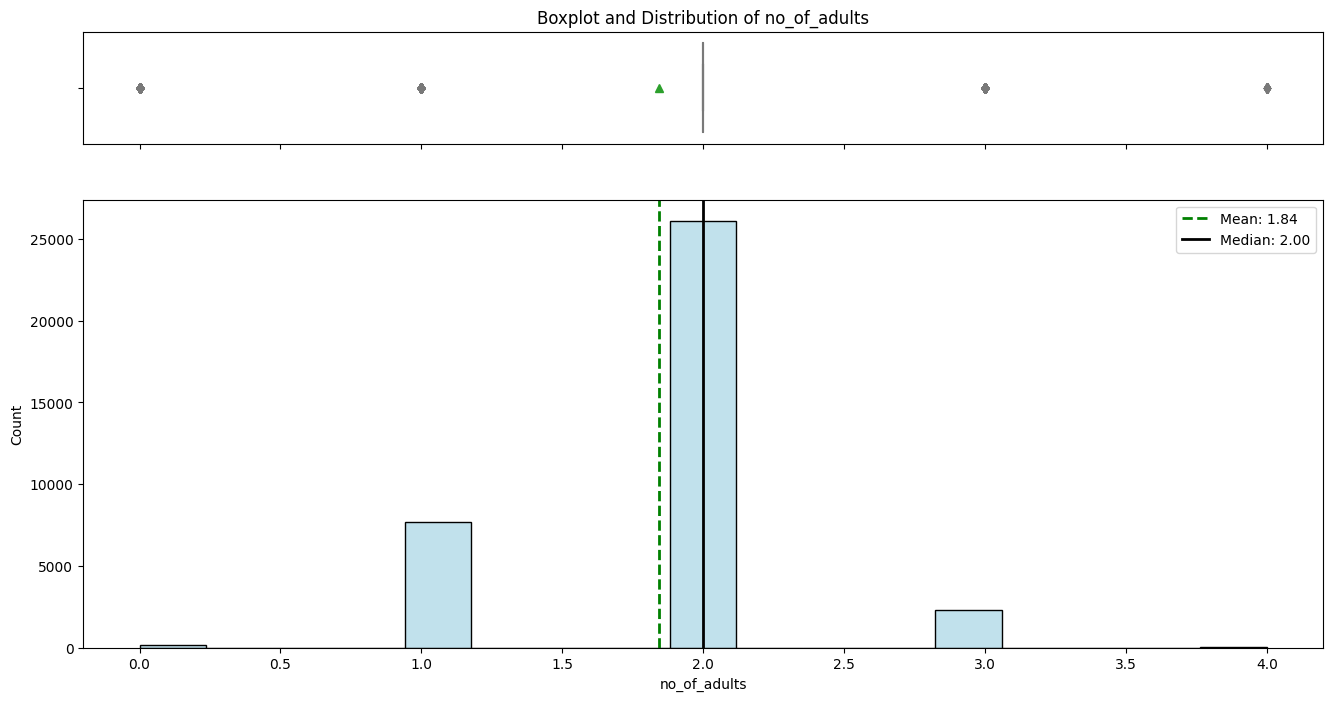

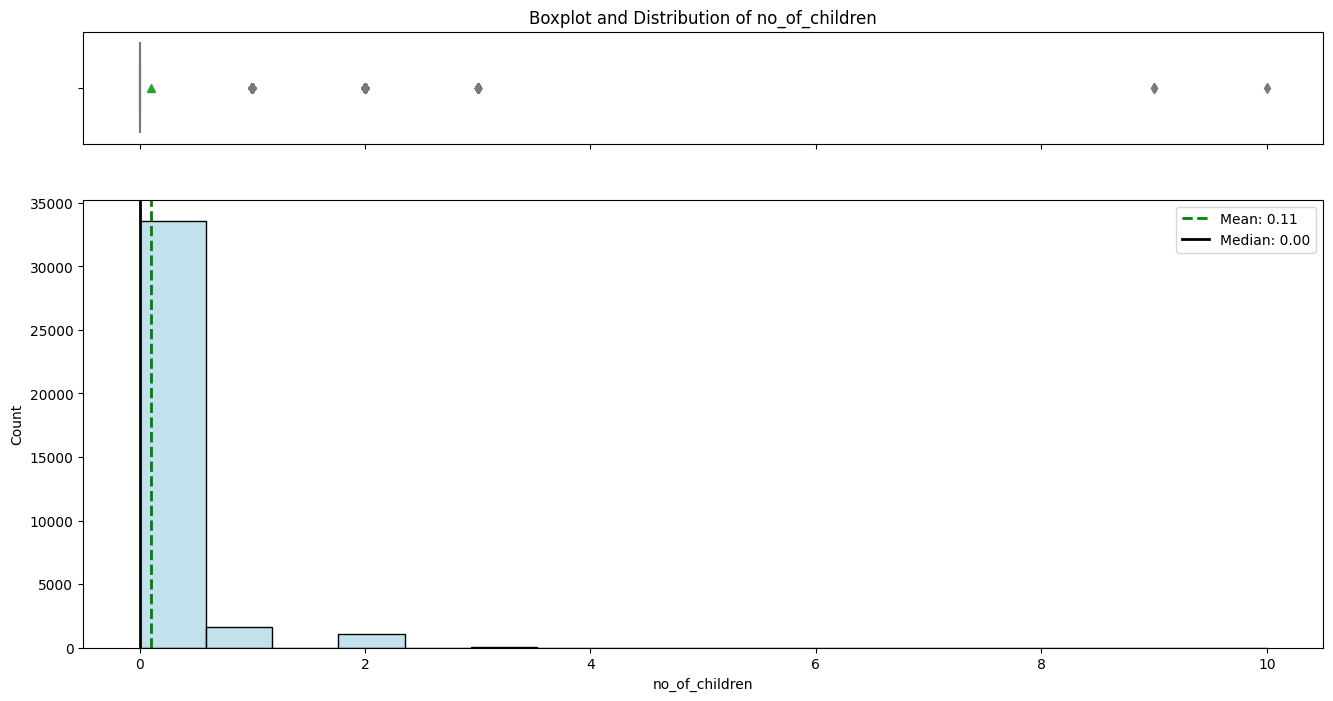

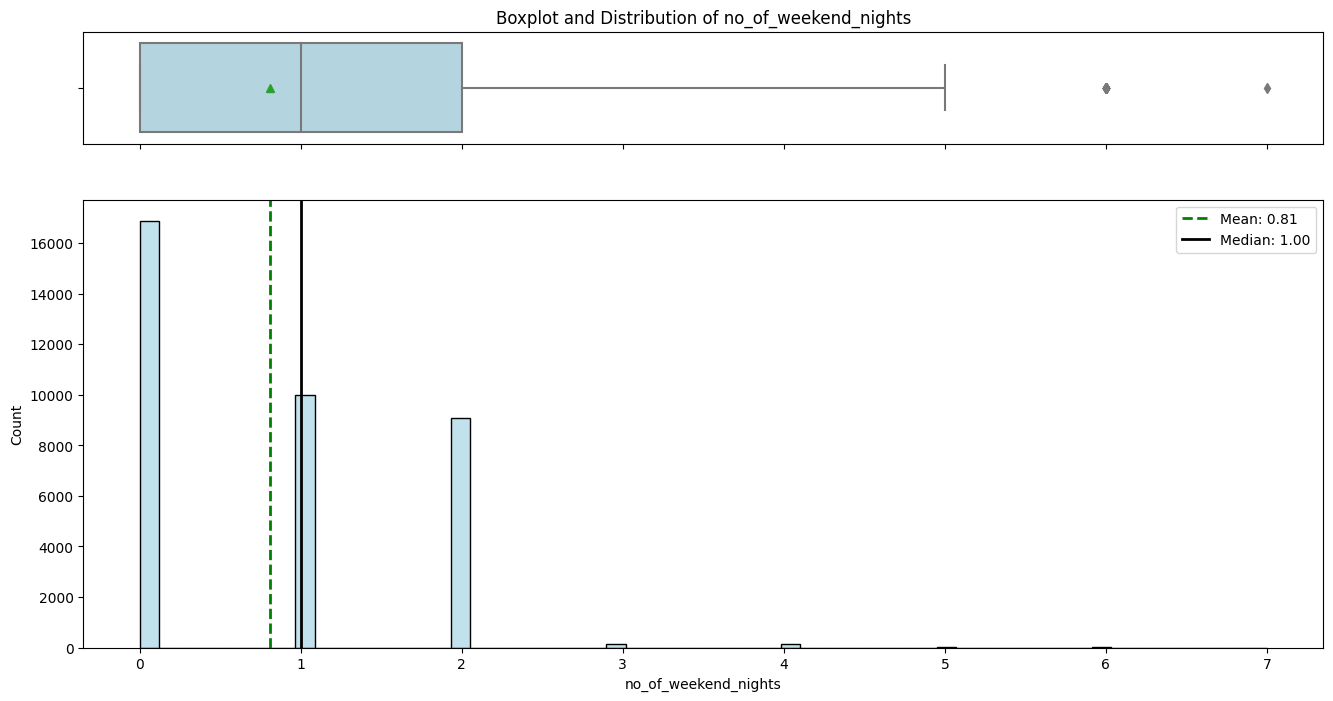

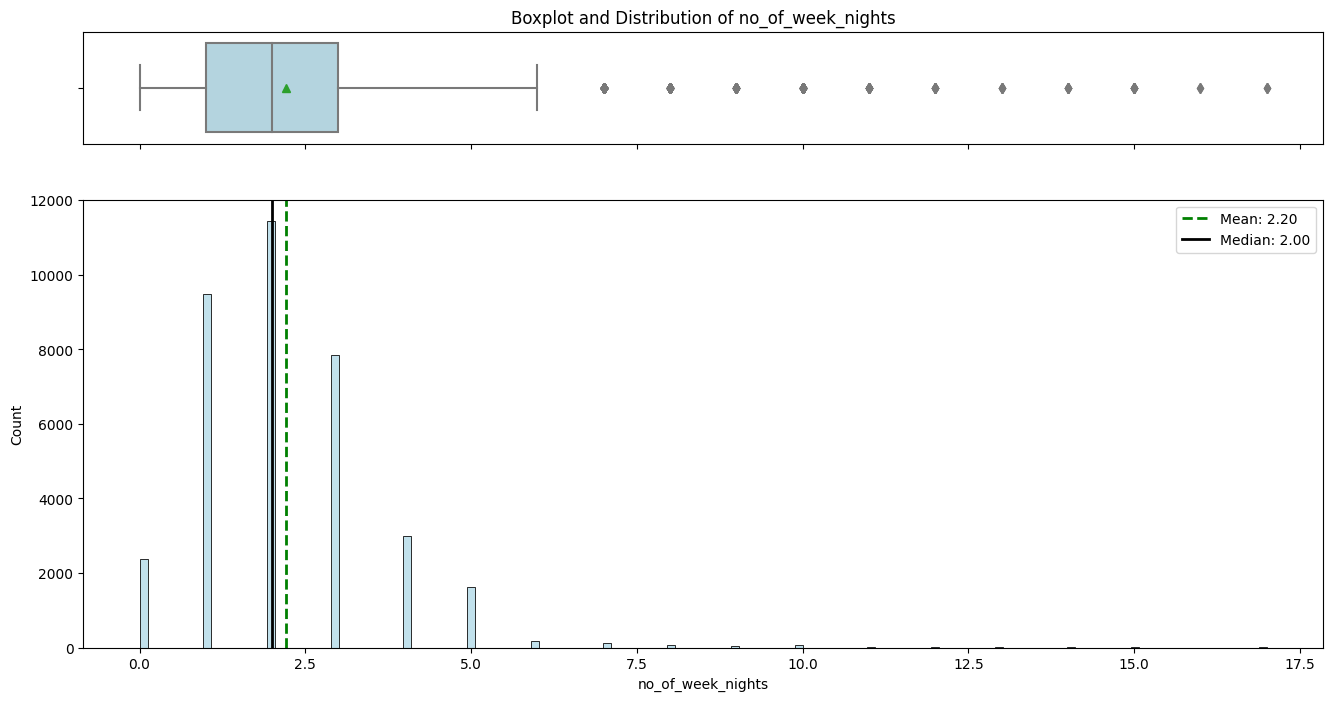

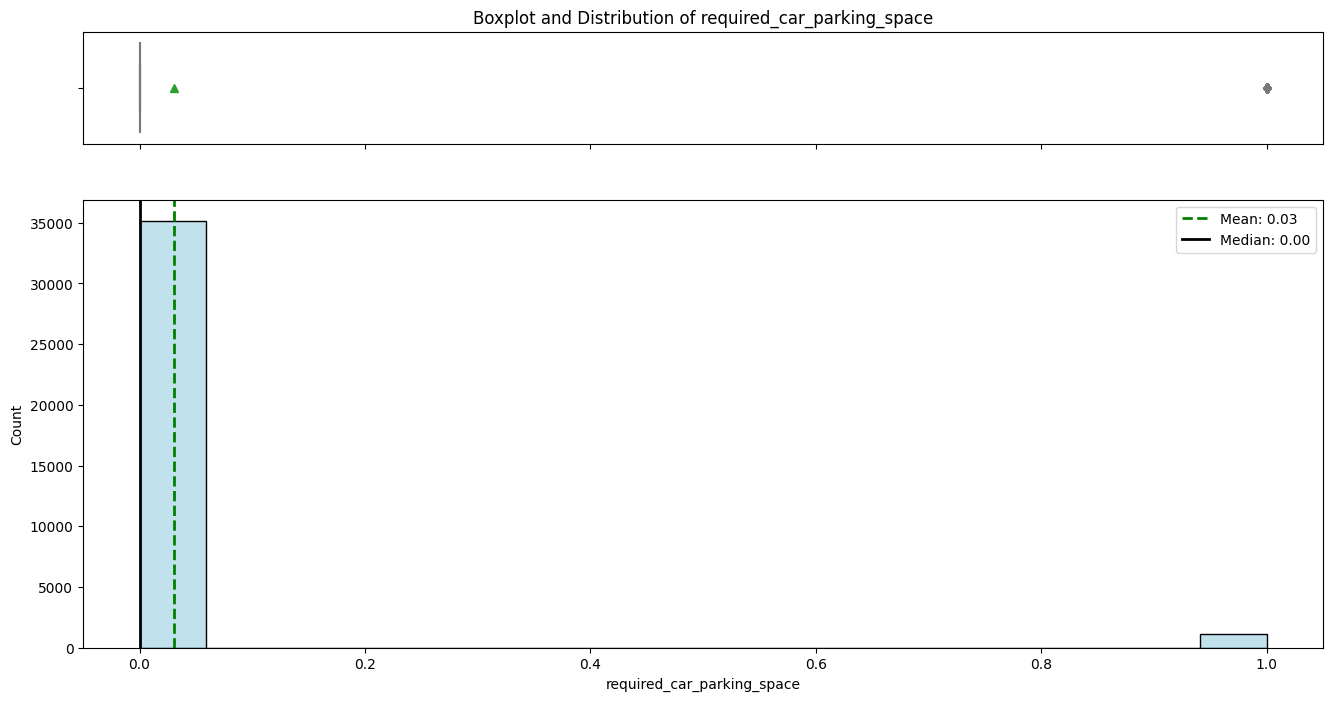

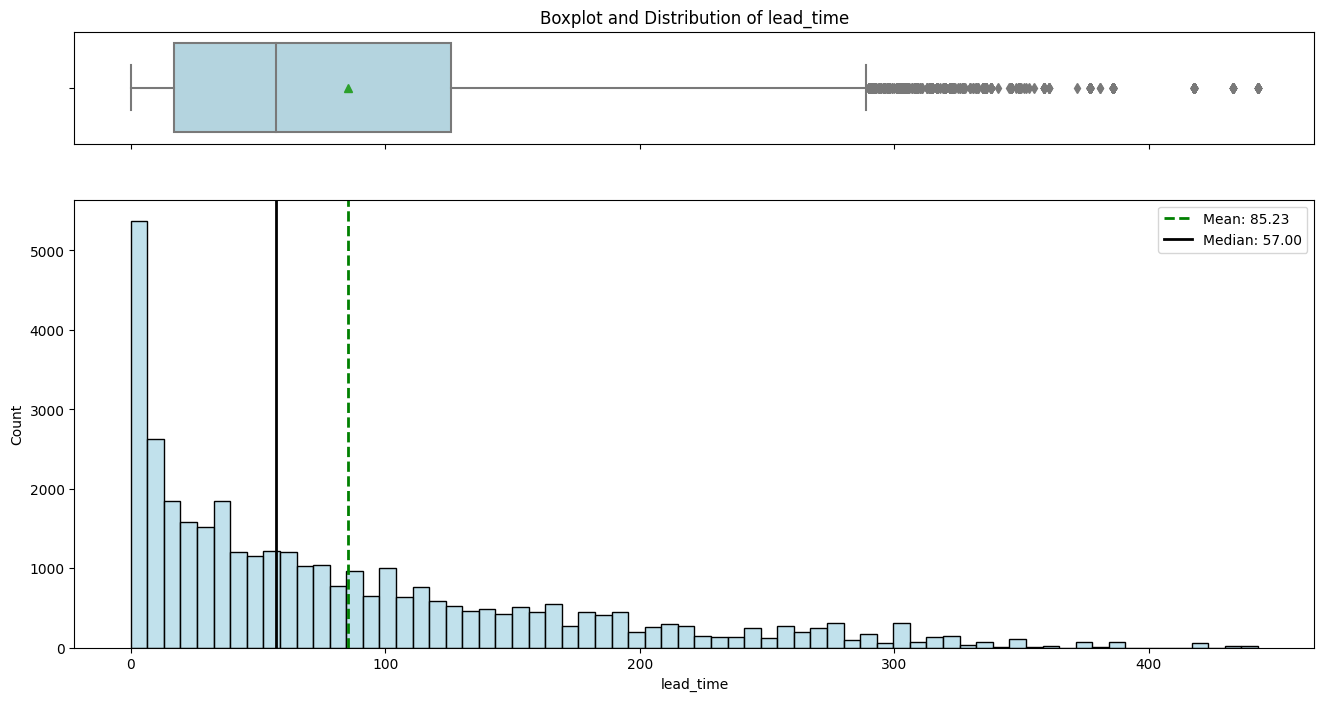

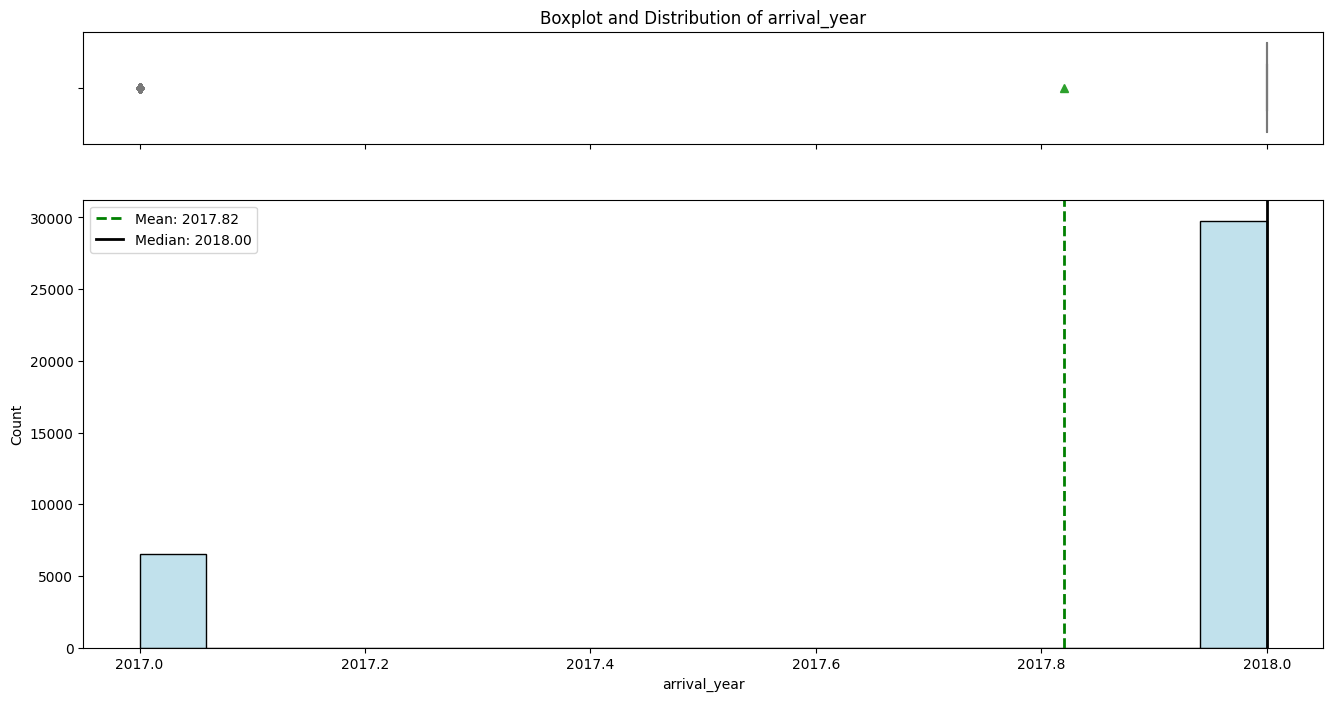

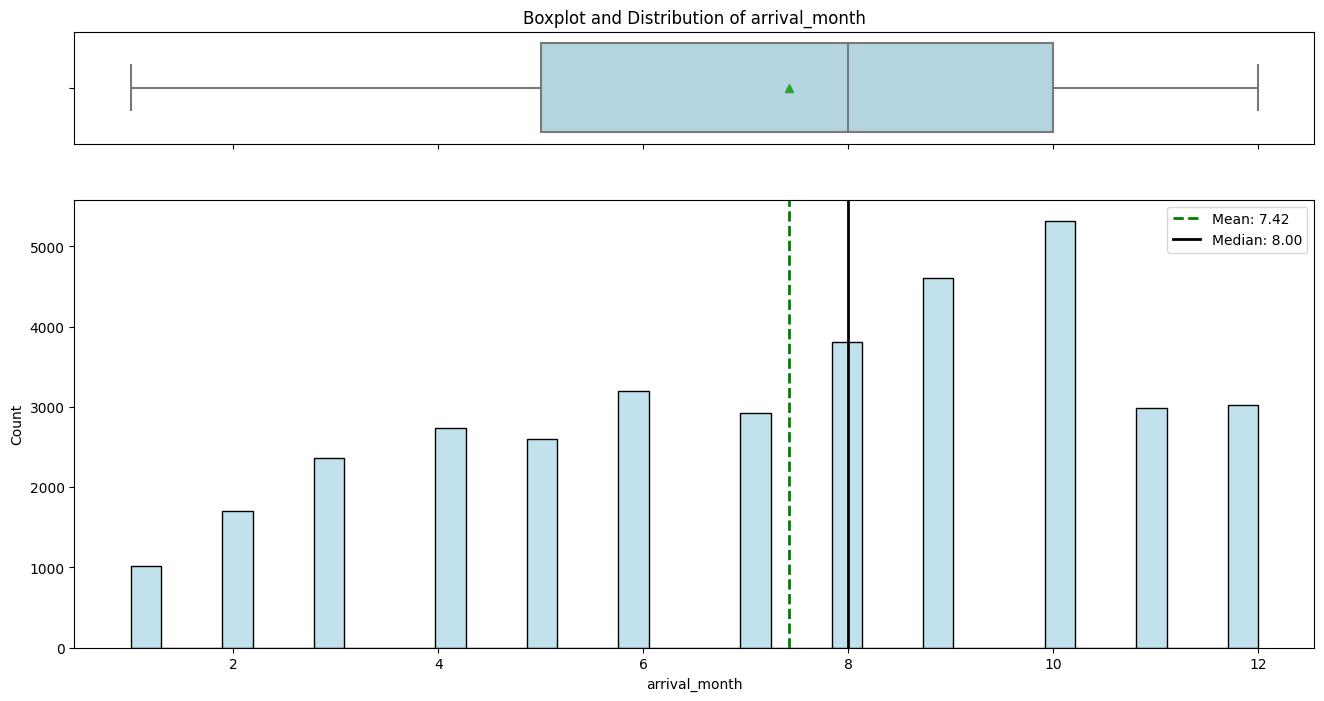

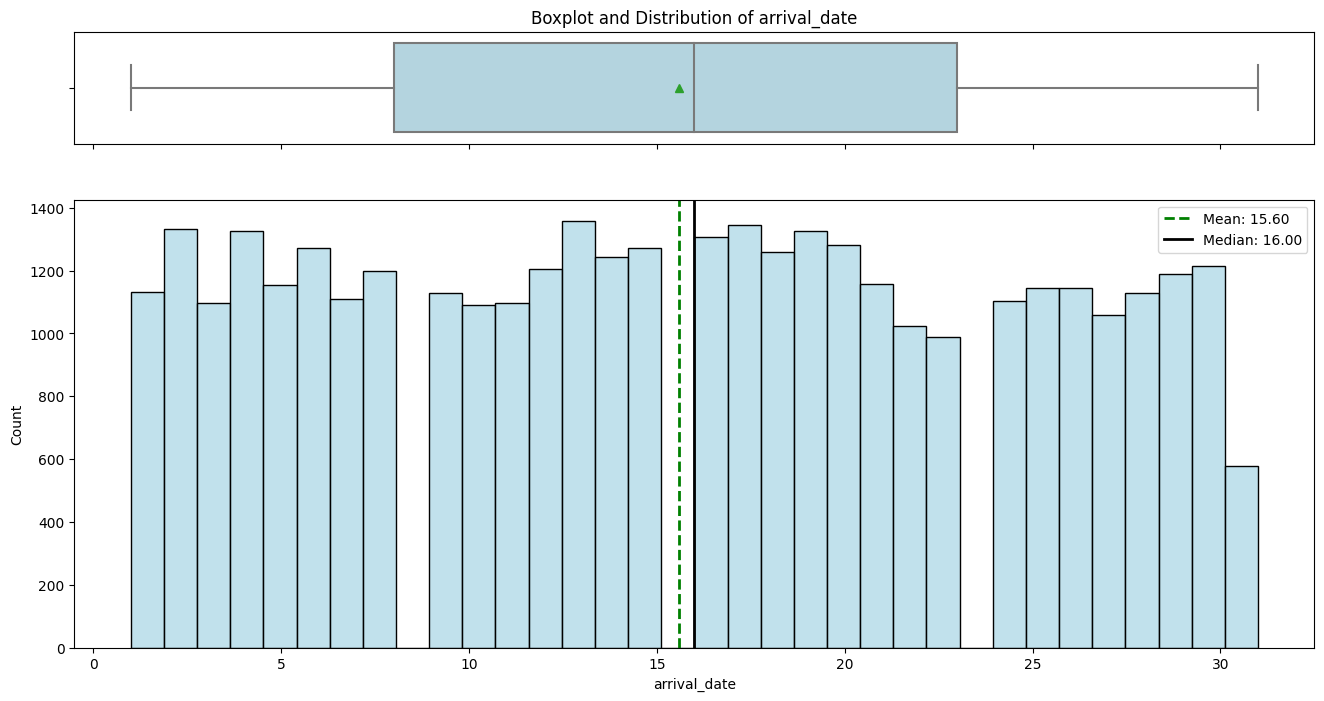

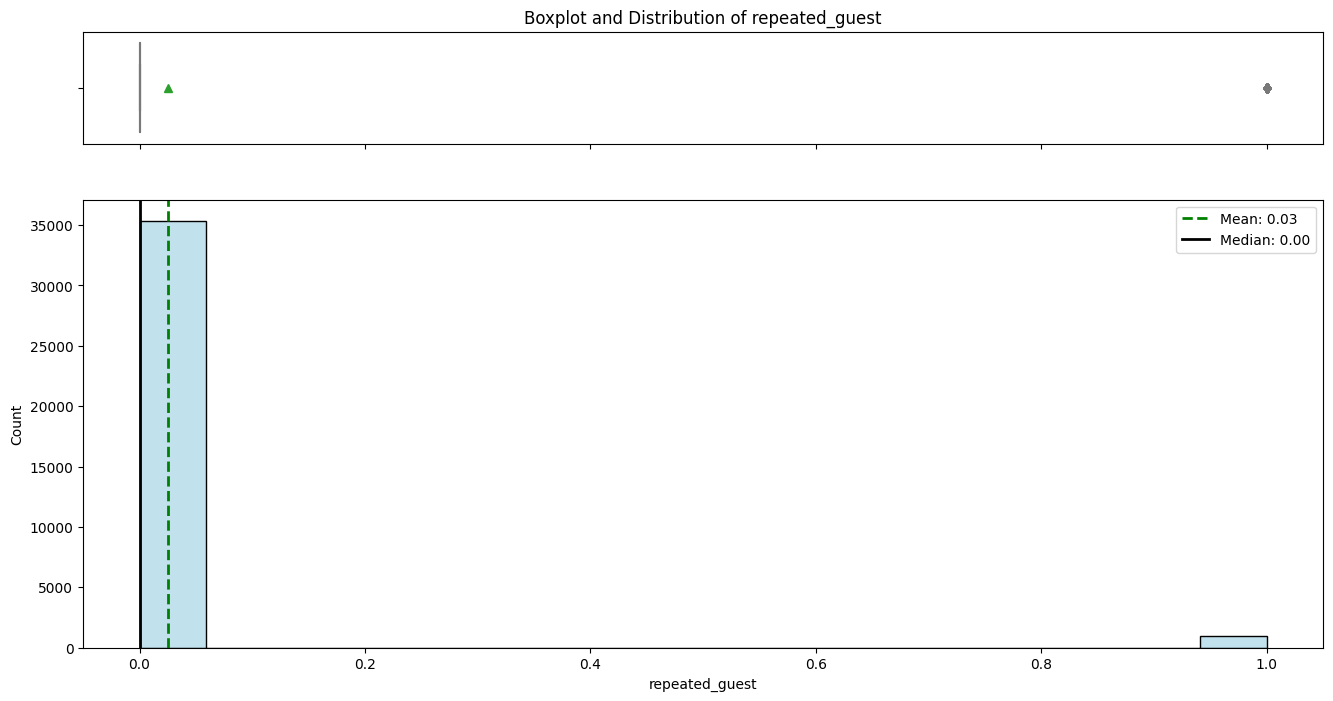

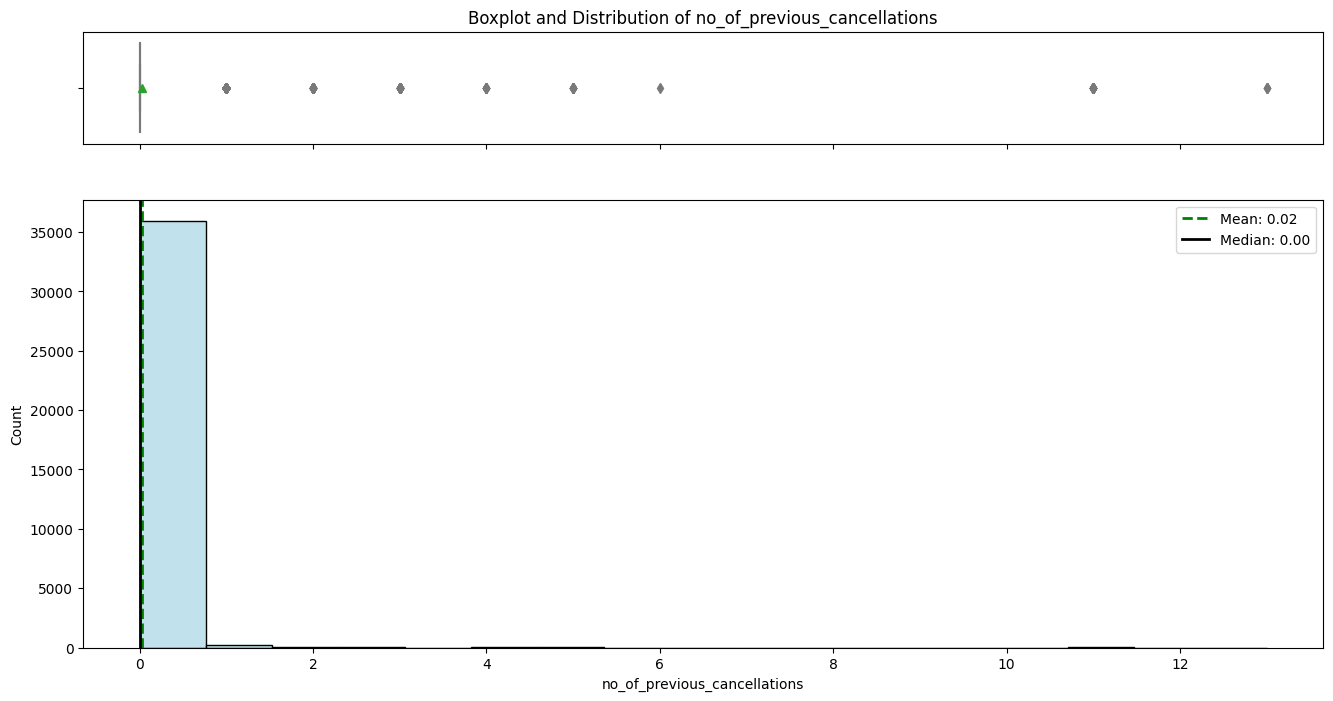

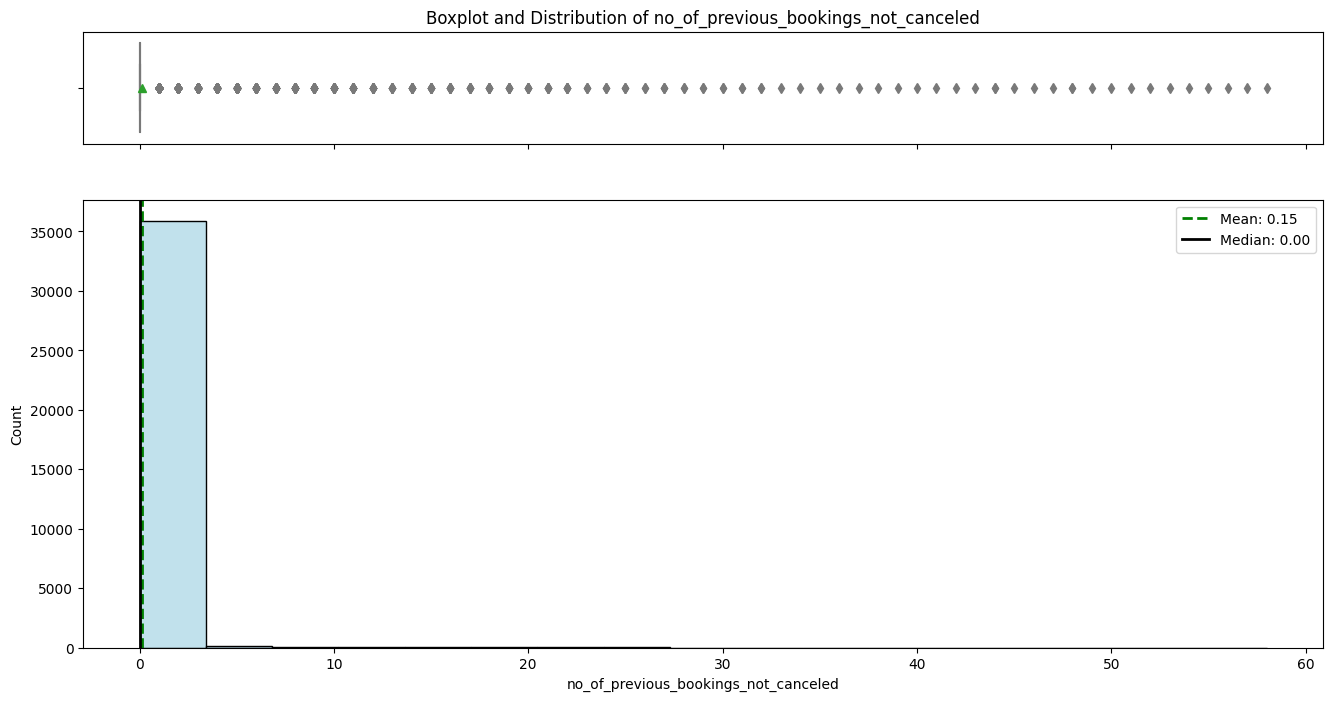

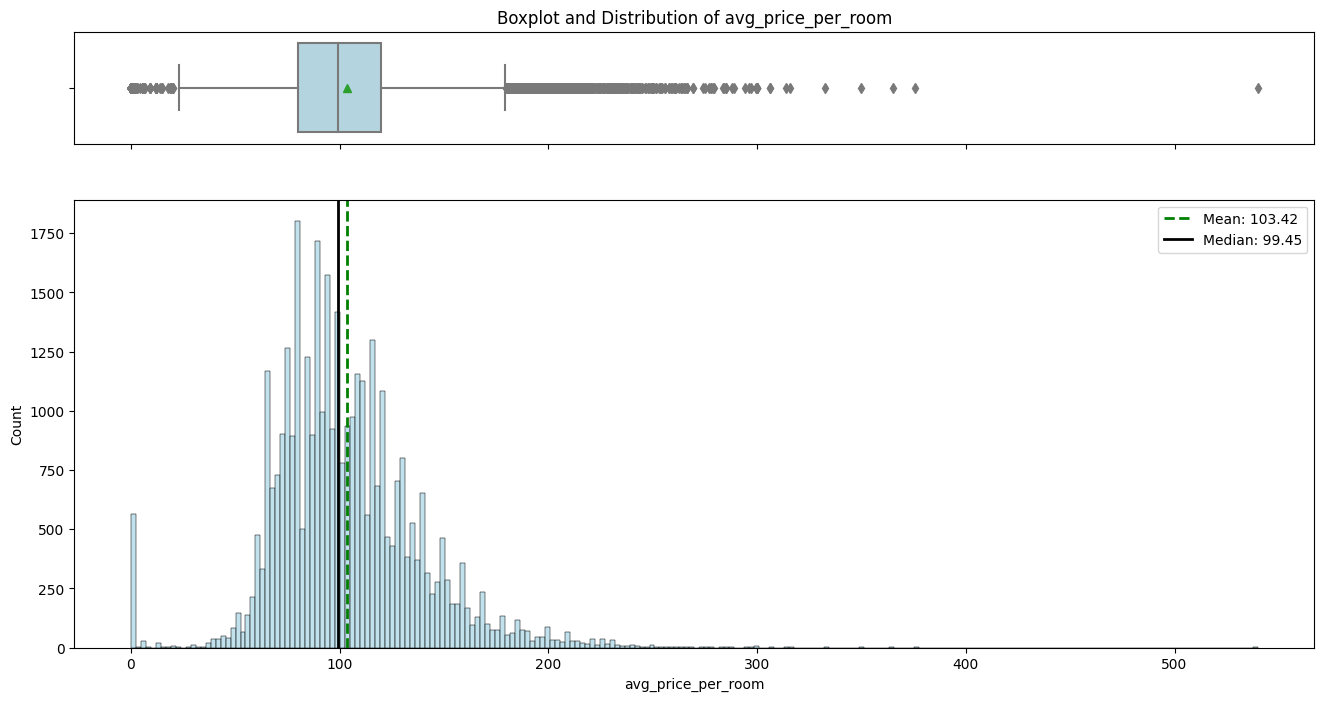

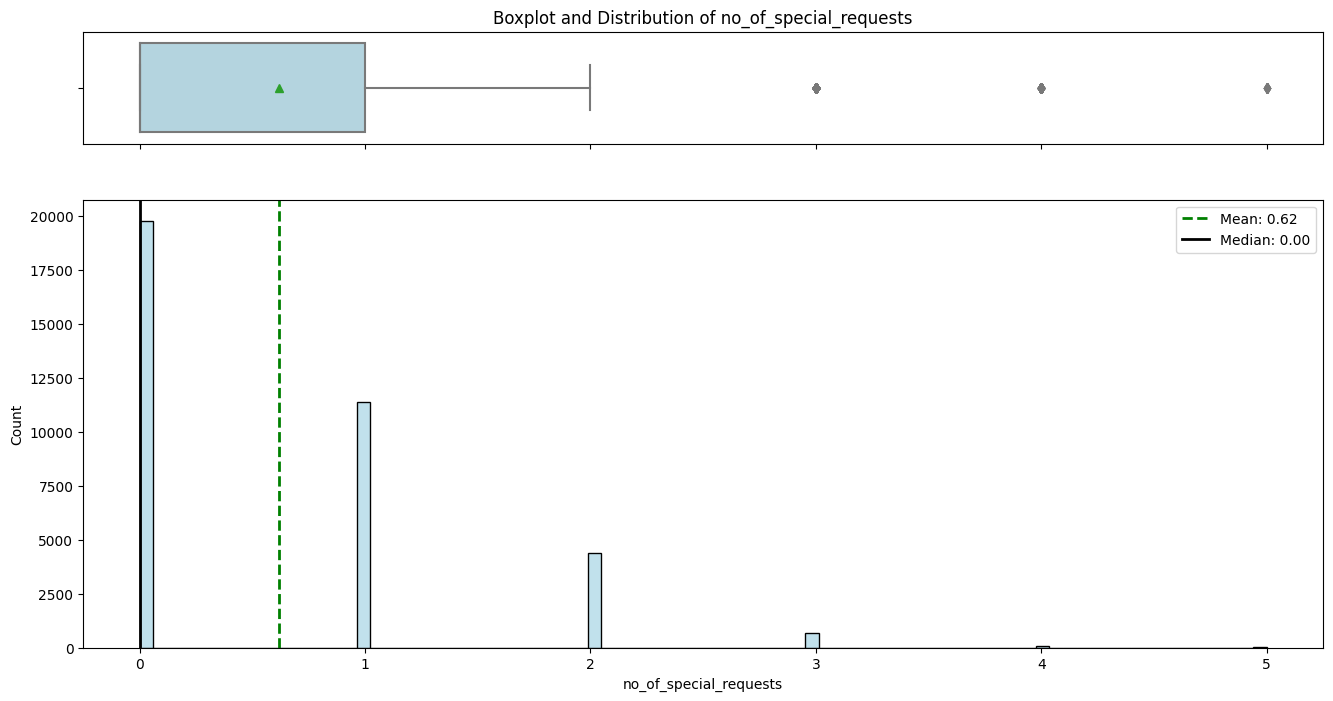

In [158]:
# Plot all the numerical variables in the data DataFrame
numerical_variables = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'repeated_guest',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room',
    'no_of_special_requests'
    ]

# Looping through the list and creating a histogram and boxplot for each variable
for variable in numerical_variables:
   hist_and_boxplot(data, variable)

## Categorical Variables

In [159]:
def custom_barplot(data, feature, perc=False, top_n=None):
    """
    Creates a bar plot with labels for each bar from the dataframe data.

    Args:
    - data: The DataFrame containing the data.
    - feature: The column name to plot.
    - perc: A boolean to indicate whether to display the percentage (True) or count (False).
    - top_n: An integer to display only the top N categories, or None to display all.

    Returns:
    None
    """
    total_entries = len(data[feature])  # The total number of entries
    category_counts = data[feature].value_counts()

    # Determine the figure size based on the number of categories
    fig_width = top_n + 2 if top_n is not None else category_counts.size + 2
    plt.figure(figsize=(fig_width, 6))

    # Create the bar plot
    category_order = category_counts.index[:top_n] if top_n is not None else category_counts.index
    barplot = sns.countplot(x=feature, data=data, order=category_order, palette='Blues_r')

    # Add labels to each bar
    for bar in barplot.patches:
        label_x_pos = bar.get_x() + bar.get_width() / 2
        if perc:
            label = f"{100 * bar.get_height() / total_entries:.1f}%"
        else:
            label = f"{bar.get_height()}"
        barplot.annotate(
            label,
            (label_x_pos, bar.get_height()),
            ha='center',
            va='bottom',
            fontsize=11,
            textcoords='offset points',
            xytext=(0, 0)
        )

    # Rotate x-axis labels if there are many categories
    if category_counts.size > 10:
        plt.xticks(rotation=45, ha='right')

    # Adding a title
    plt.title(f'Distribution of {feature}', fontsize=15)

    plt.show()

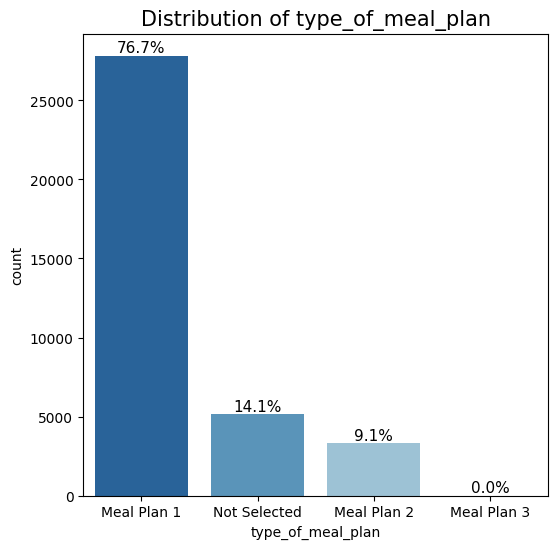

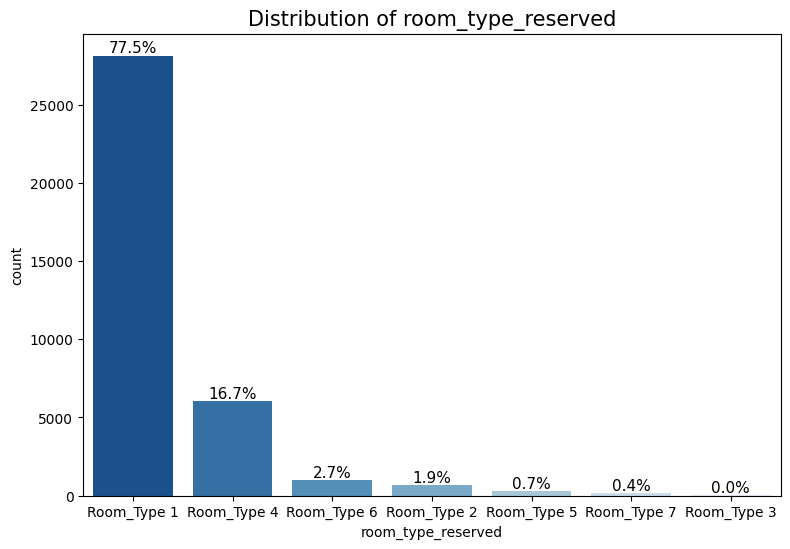

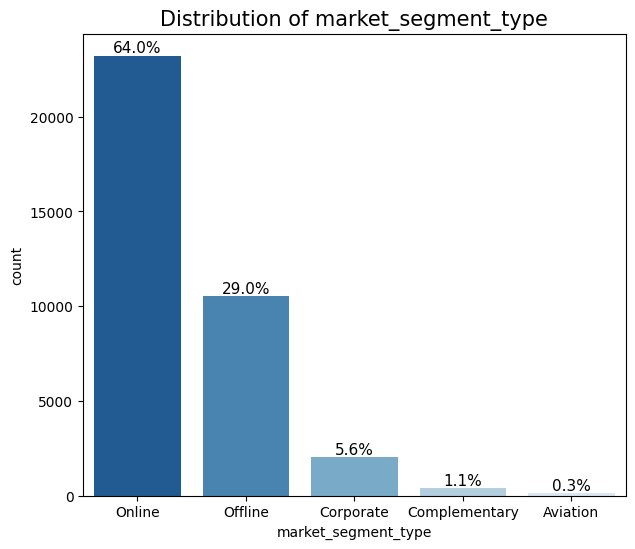

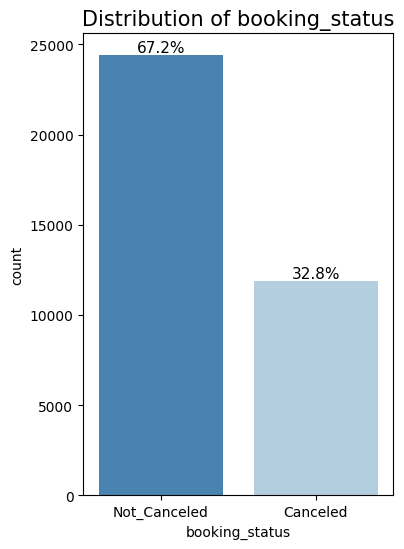

In [160]:
# List of categorical variables in the data DataFrame
categorical_variables = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Looping through the list and creating a custom barplot for each variable
for variable in categorical_variables:
    custom_barplot(data, variable, perc=True)

# Data Pre-processing

## Outlier Capping

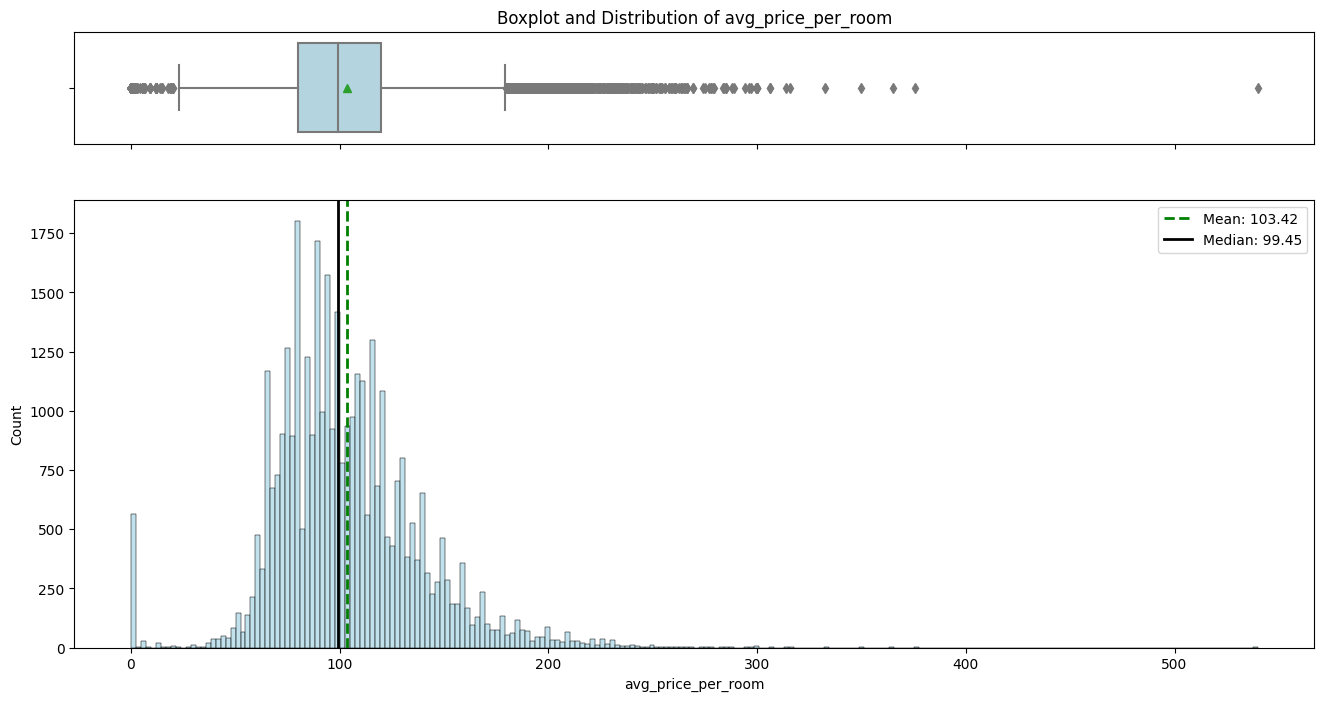

In [161]:
# Visualize the distribution of the avg_price_per_room again
hist_and_boxplot(data, 'avg_price_per_room')

In [162]:
# Inspect bookings where the average price per room is recorded as 0, which could indicate missing or incorrect data
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [163]:
# Look at the market segment types for those bookings with an avg_price_per_room of 0 to possibly understand if there is a ppattern or reason behind those values
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

Observations:

* Complimentary Stays: could include promotional stays or loyalty program rewards or accomodations given to staff or VIP. Not going to exlude or correct the zero-priced bookings.



In [164]:
# Calculating the 25th quantile of the average room price
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile of the average room price
Q3 = data["avg_price_per_room"].quantile(0.75)


# Calculating interquartile range (IQR), which is a measure of statistical dispersion and is used to identify outliers
IQR = Q3 - Q1

# Calculating value of upper whisker, which is the typical threshold for identifying upper outliers in the data
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

Observations:

The price 179.55 represents the threshold above which data points are considered outliers of the average room price distribution. To reduce the influence of these outliers in the predictive model the room prices will be capped at 179.55.

In [165]:
# Use capping method for outlier treatement
# Assigns the value of the upper whisker to any avg_price_per_room values that are extreme outliers (in this case, arbitrarily chosen as>=500)
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## Grouping Features Together

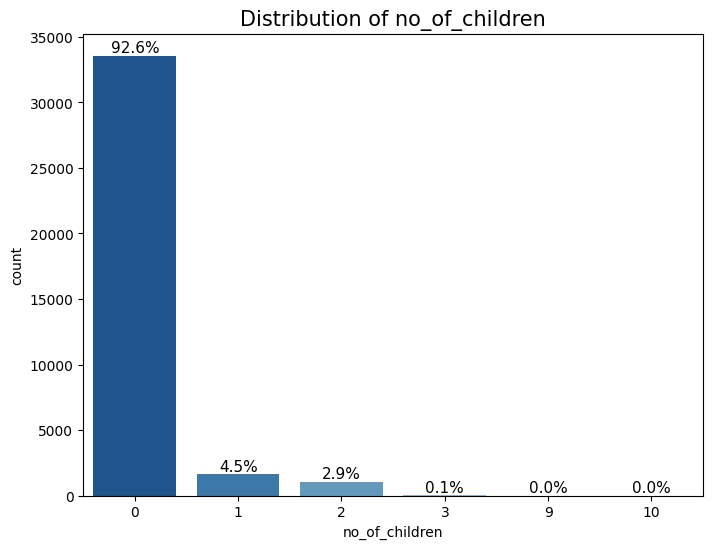

In [166]:
# Visualization of the number_of_children variable using the custom_barplot function
custom_barplot(data, 'no_of_children', perc=True)

Observations:

Bookings with three children are very rare (0.1%), and there are no occurrences of bookings with 9 or 10 children. Use the approach of grouping bookings with 9 and 10 children with those with 3 children, simplifying the data and potentially reducing noise.

In [167]:
# Group 9,10, and 3 childrean by replacing 9, and 10 children with 3 in the dataset
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

## Label Encoding

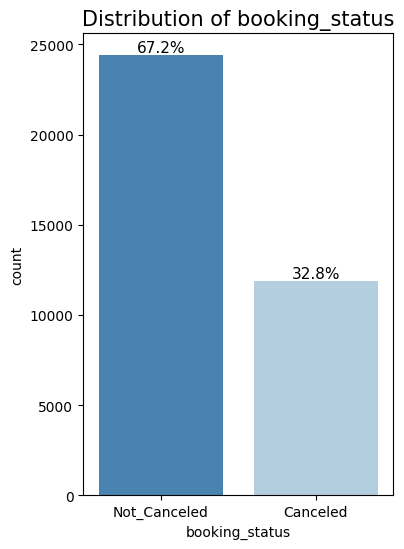

In [168]:
# Visualization of the booking_status variable using the custom_barplot function
custom_barplot(data, 'booking_status', perc=True)

Observations:

The `booking_status` categorical variable has two categories "Not_Canceled" and "Canceled" which can be transformed with **label encoding** into two unique binary or ordinal (consisting of inherent order) categories of 0 and 1.

Note: This is not the same as dummy variable encoding (one-hot encoding) which is used for categorical variables with more than two categories that don't have intrinsic ordering.



In [169]:
# Encode 'Canceled' bookings as 1 and 'Not_Canceled' bookings as 0 for further analysis
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [170]:
# Check unique values after encoding
print("Unique values after encoding:", data["booking_status"].unique())

Unique values after encoding: [0 1]


In [171]:
# Check data type
print("Data type of 'booking_status':", data["booking_status"].dtype)

Data type of 'booking_status': int64


In [172]:
# View a sample of the data
print(data.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

## Bivariate Analysis

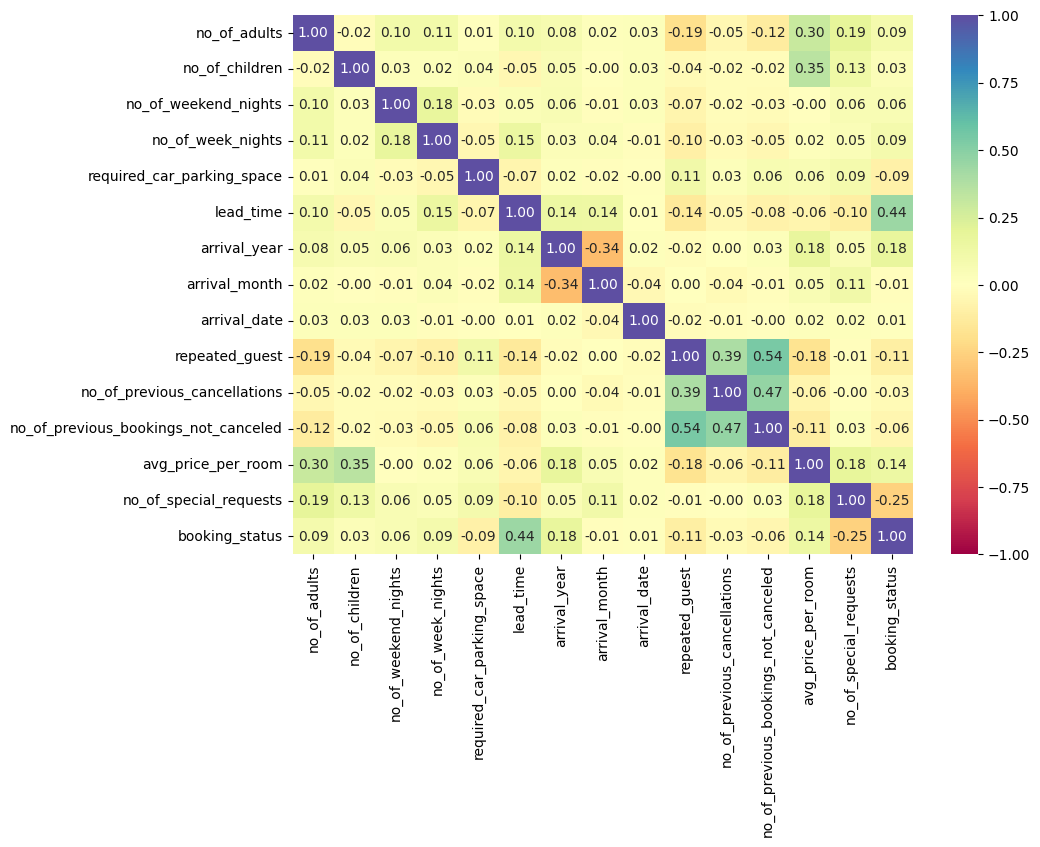

In [173]:
# Heatmap of the correlation coefficients between numerical variables in the dataset
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

* A positive correlation with booking_status means a variable is associated with a higher likelihood of cancellation.
* Data imbalance: for no_of_children, most of the data indicates no children (92.6%), the model may be biased towards predictions for guests without children.
* Heatmap does not account for the following categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type.

In [174]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart of counts and percentages of the categories of the predictor variable against the target variable.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), color=['#B3CEDE','#4884A4'])
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

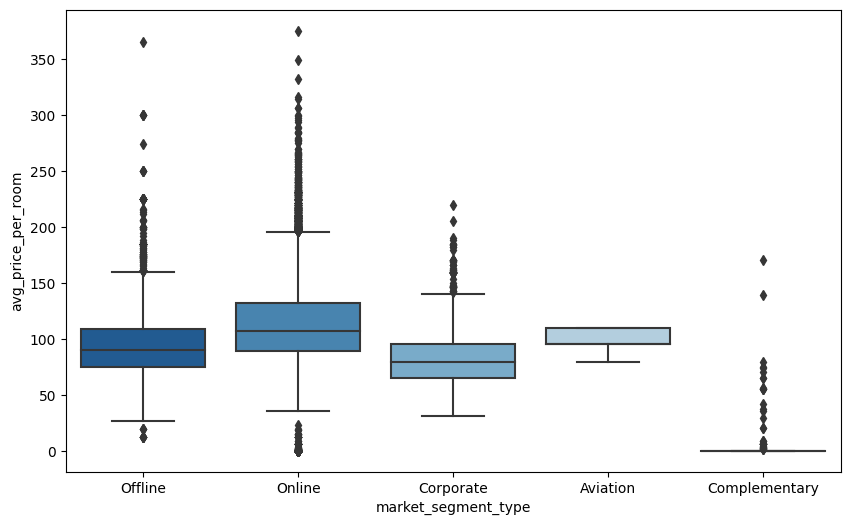

In [175]:
# Visualizing how hotel rates vary across different market segments with a boxplot
# Identifying which market segments are associated with higher or lower room rates
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="Blues_r"
)
plt.show()

Observations:
* The variability in average price per room is highest in the Offline and Online segments.
* The Corporate segment tends to have more consistent pricing.
* The Aviation segment has the most uniform pricing with the fewest and lowest outliers.
* Complementary bookings, as expected, are typically low or zero cost, aligning with their nature.

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


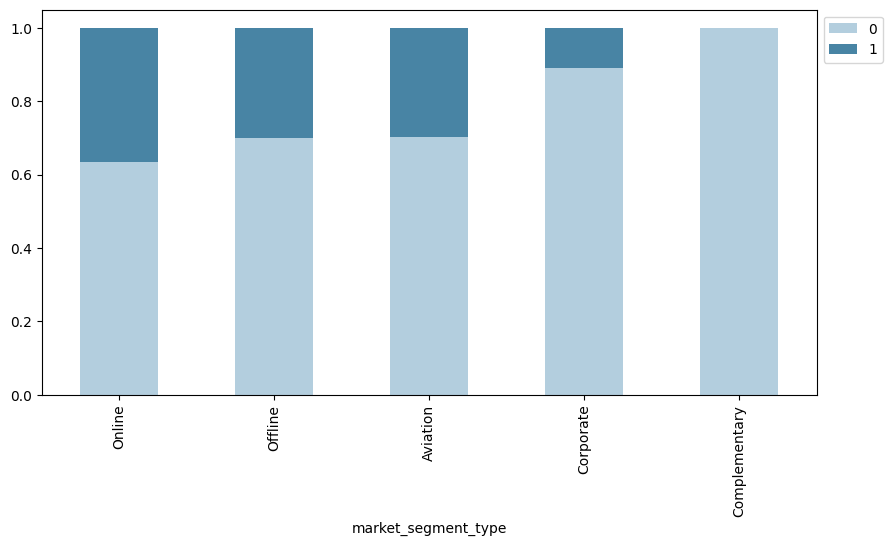

In [176]:
# How booking status (canceled=1 vs. not canceled=0) varies across different market segments and total number of bookings in each segment (denoted as 'All')
stacked_barplot(data, "market_segment_type", "booking_status")

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


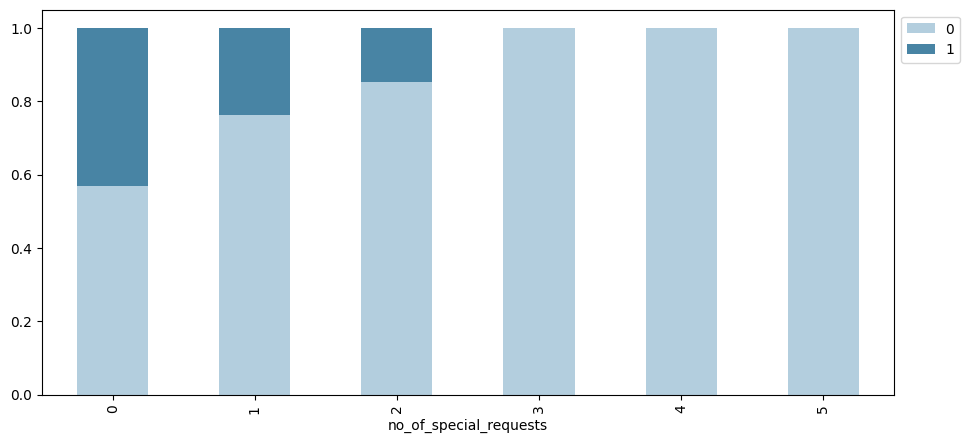

In [177]:
#Stacked Barplot showing the proportion of bookings that were canceled versus not canceled across different numbers of special requests.
stacked_barplot(data, "no_of_special_requests", "booking_status")  ## Complete the code to plot stacked barplot for no of special requests vs. booking status

Observations:

The plot shows the proportion of bookings that were not canceled (0) and canceled (1) across different numbers of special requests (0 to 5).

* As the number of special requests increases, the proportion of canceled bookings decreases. This might suggest that guests who make more special requests are more committed to their stay and less likely to cancel.

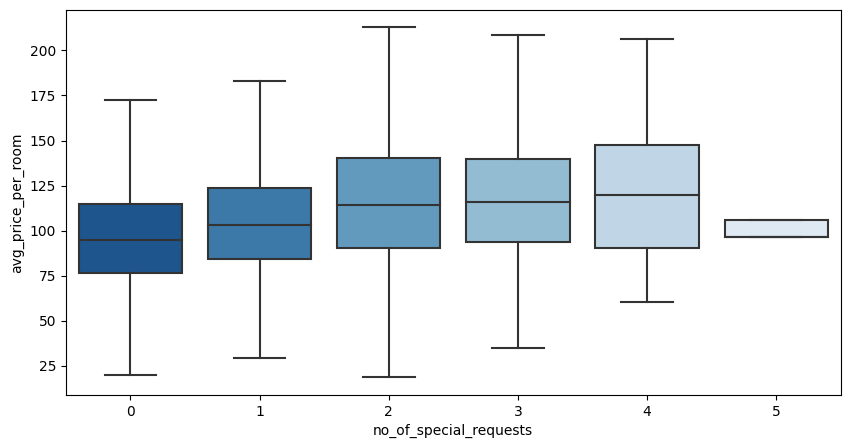

In [178]:
#Boxplot shows the distribution of the average price per room for different numbers of special requests made by customers, excluding outliers.
plt.figure(figsize=(10, 5))
# Boxplot for no of special requests vs. average price per room (excluding the outliers)
sns.boxplot(x="no_of_special_requests", y="avg_price_per_room", data=data, showfliers=False, palette="Blues_r")
plt.show()

In [179]:
# Colors in hex
colors = ["#1c5d99", "#4884AF", "#79ABC9", "#B3CEDE", "#DAE6F1"] 

def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    target_uniq = data[target].unique()

    # For the histograms, alternate between the first two colors for the two unique targets
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],  # Changed color
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[2],  # Changed color
        stat="density",
    )
    # For the boxplots, use all the colors in the provided list
    # Note: Since there are only two targets,will see only two of the colors by default
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette='Blues_r' # Changed palette
    )
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='Blues_r'  # Changed palette
    )
    plt.tight_layout()
    plt.show()

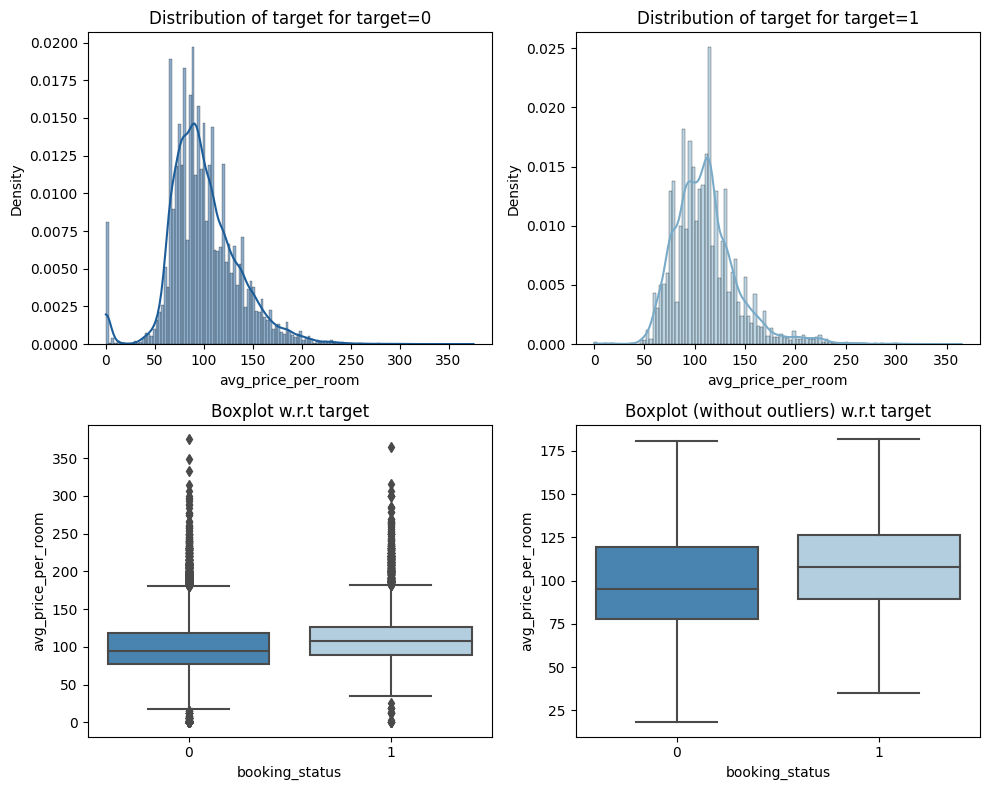

In [180]:
# Investigate the positive correlation between booking status and average price per room
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

Observations:

* Boxplots without outilers show that the interquartile ranges are comparible with those with outliers so no outlier treatement necessary.

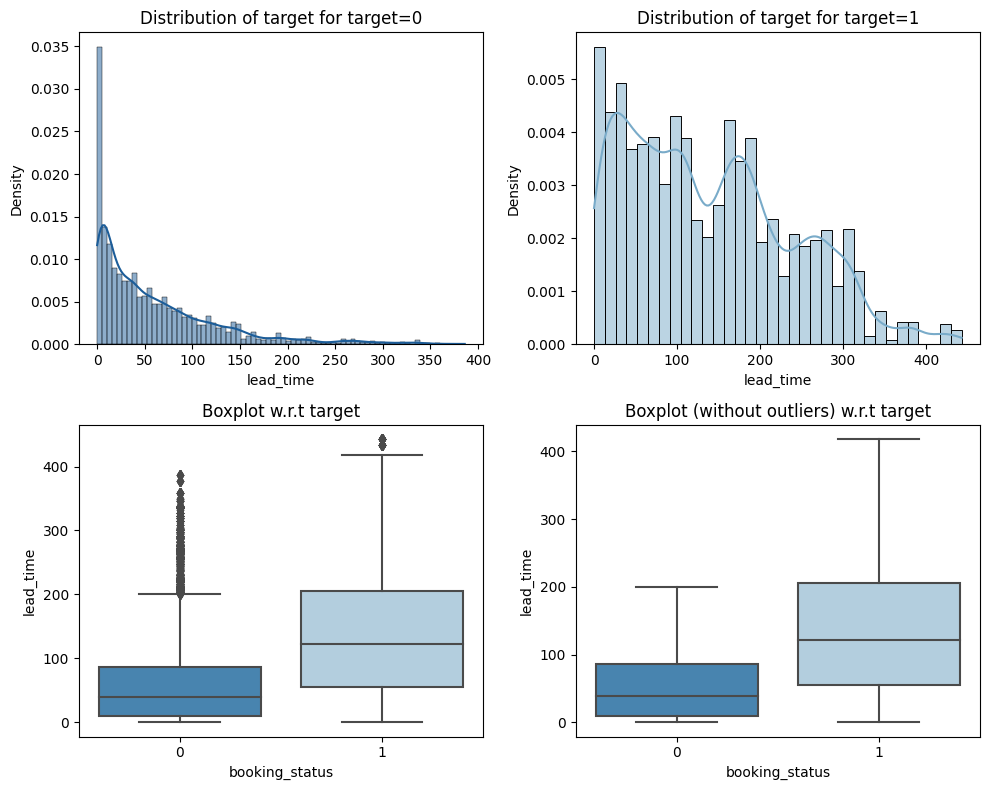

In [181]:
# Investigate the positive correlation between booking status and lead time
distribution_plot_wrt_target(data, "lead_time", "booking_status") 

Observations:

* It might be useful to segment lead_time into categorical bins (e.g., short, medium, long) or to create features that capture the non-linearity of this distribution.
* Leave outliers alone.

In [182]:
#Create a new DataFrame called family_data selecting rows where there are one or more adults
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

(28441, 18)

In [183]:
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


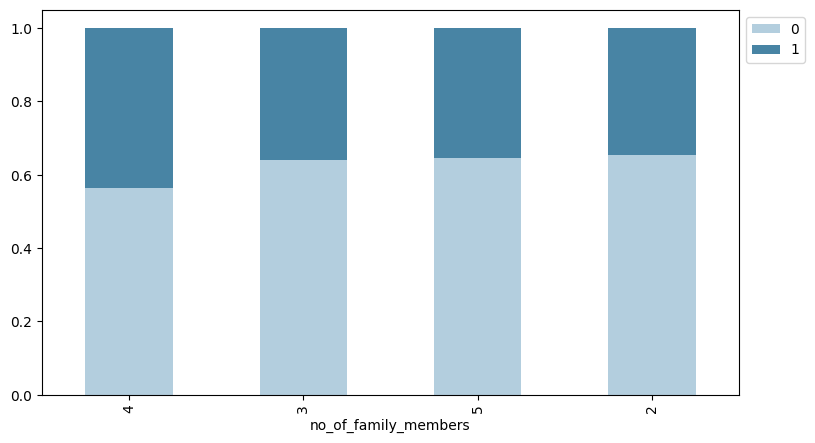

In [184]:
#Stacked barplot for no of family members and booking status
stacked_barplot(family_data, "no_of_family_members", "booking_status")

In [185]:
# Look at the customer who stay for at least a day at the hotel
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [186]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

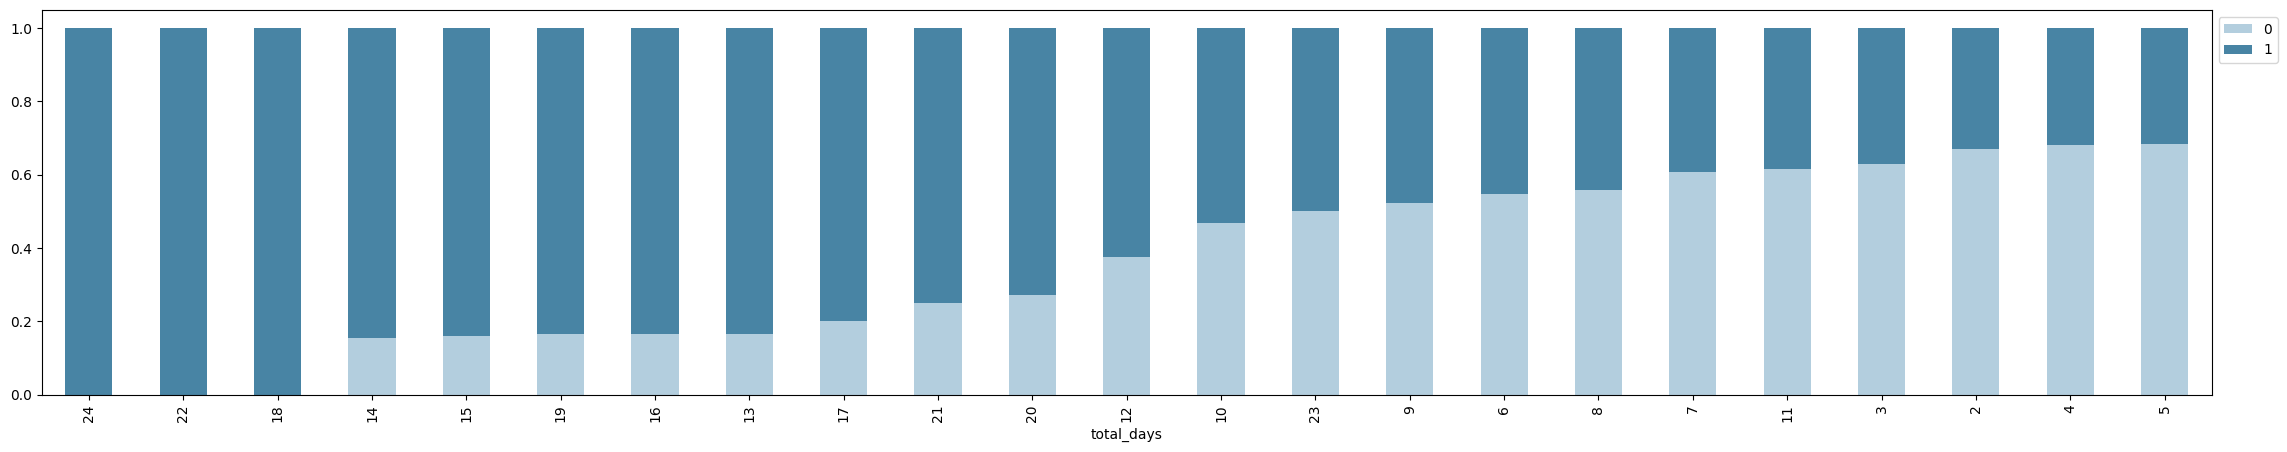

In [187]:
# Representing the proportion of canceled (1) and not canceled (0) bookings across different total lengths of stay (total_days) at the hotel
# Stacked barplot for total days and booking status
stacked_barplot(stay_data, "total_days", "booking_status")


Observations:

* The majority of stays are 3 to 7 days long, with shorter stays being more common than longer ones.
* Though there is a pattern of increasing cancellations with the length of stay it seems to be a non-linear relationship.
* For evaluation of predictive models, it will be important to ensure that the model's performance is assessed across the different lengths of stay, as the relationship with cancellation likelihood appears complex



booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


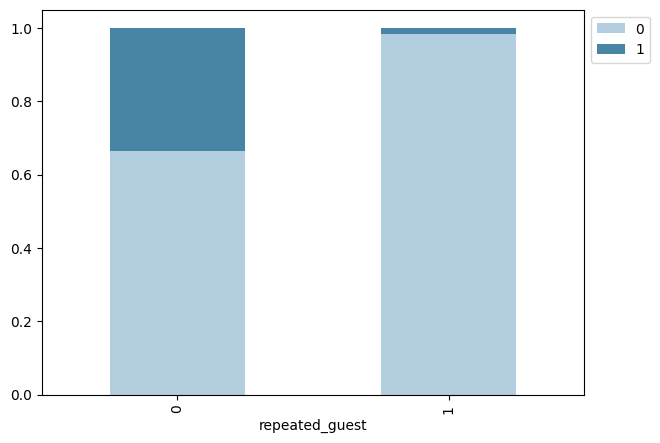

In [188]:
#Stacked barplot for repeated guests and booking status
stacked_barplot(data, "repeated_guest", "booking_status")

Observations:
* Repeated guests (labeled '1')  have a lower cancellation rate compared to new, non-repeated guests (labeled '0') 

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


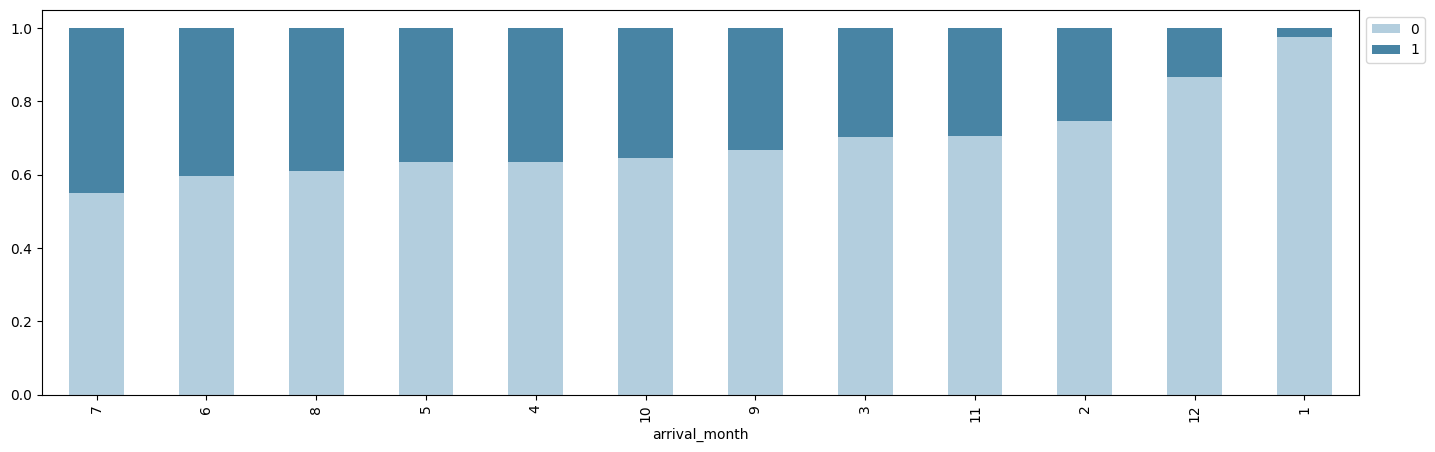

In [189]:
# Stacked barplot for arrival month and booking status
stacked_barplot(data, "arrival_month", "booking_status")

Observations:

The table and barplot lists the number of not canceled (0) and canceled (1) bookings for each arrival month, along with the total bookings for that month (All).


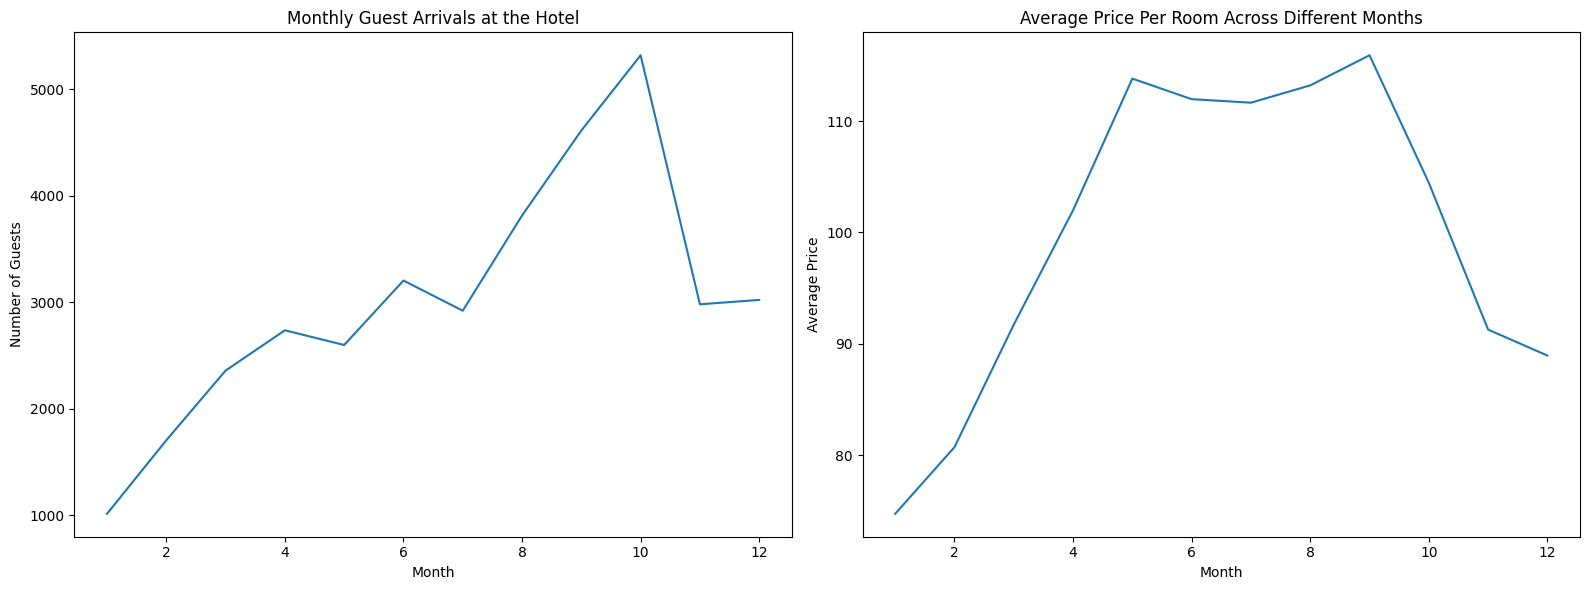

In [190]:
# Group the data on arrival months and extract the count of bookings
monthly_guests_data = data.groupby("arrival_month")["booking_status"].count().reset_index()

# Calculate the average price per room for each month
monthly_price_data = data.groupby('arrival_month')['avg_price_per_room'].mean().reset_index()

# Set up the matplotlib figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the monthly guest arrivals trend on the first subplot
sns.lineplot(data=monthly_guests_data, x="arrival_month", y="booking_status", ax=ax1)
ax1.set_title('Monthly Guest Arrivals at the Hotel')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Guests')

# Plotting the average price per room on the second subplot
sns.lineplot(data=monthly_price_data, x='arrival_month', y='avg_price_per_room', ax=ax2)
ax2.set_title('Average Price Per Room Across Different Months')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Price')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


Observations:

* The peak arrival around October, suggesting a high season (aka high demand).
* The price increases and reaches a relatively high platteau during the summer time before dropping significantly after October. 
* This decrease corresponds to the Monthly Guest Arrivals at the Hotel graph earlier. Together they can be used for seasonal changes in pricing strategies, where prices are raised during high-demand periods (summer) and lowered during off-peak times, after October.

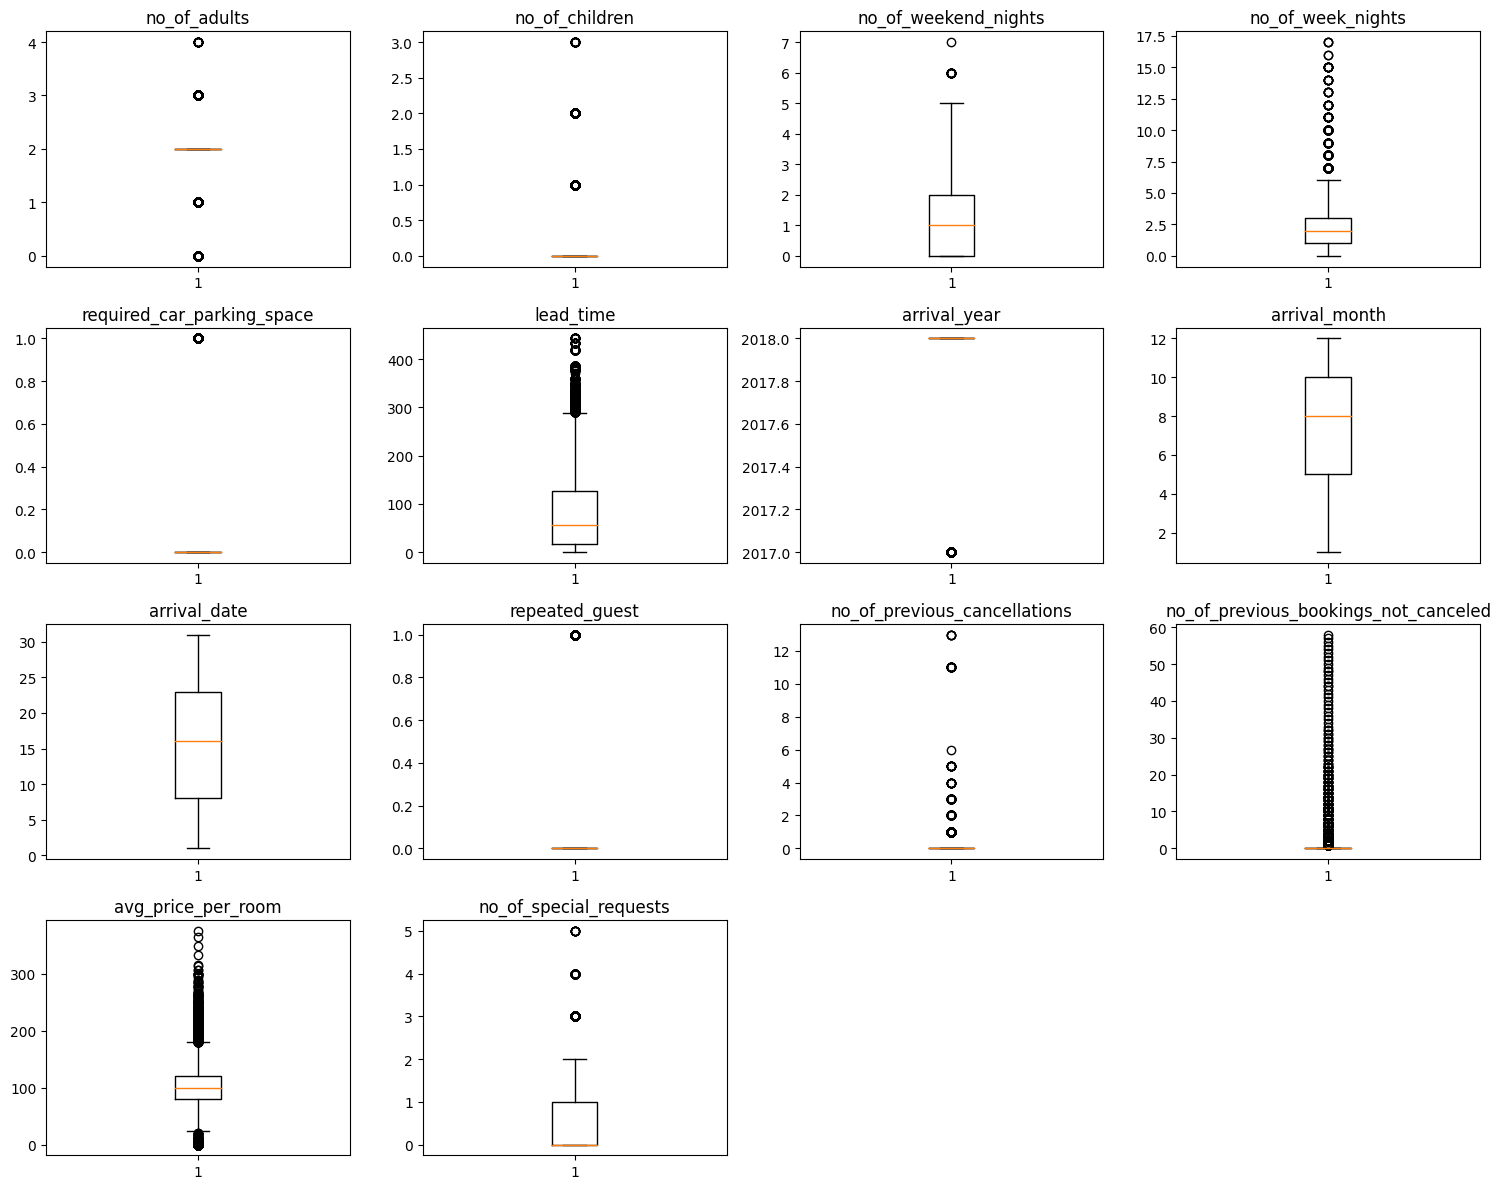

In [191]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status because it is a binary categorical variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Model Building

# Logistic Regression 

- We want to predict which bookings will be canceled.


In [192]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant to X
X = sm.add_constant(X) # add an inyrcept term to the model

# Create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True) 

# Splitting data in train and test sets in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [193]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


#### Building Logistic Regression Model

In [194]:
# Fit logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                  0.3292
Time:                        04:27:54   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

In [253]:
# Function to compute different performance metrics for classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [196]:
# Function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [197]:
# Print the training performance
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train.astype(float), y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


## Detecting and Adressing Multicollinearity

One way to detect multicollinear features is vie VIF. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* Do not drop dummy variables

In [198]:
# Function to check Variation Inflation Factor (VIF) 
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [199]:
checking_vif(X_train.astype(float))

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


Observations:
All but market_segment_type variables have VIFs withing acceptable range.

## Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 one at a time, starting with the highest.
- Use a loop if too many high ps

In [200]:
# Convert the entire DataFrame to float at the beginning
X_train_float = X_train.astype(float)

# initial list of columns
cols = X_train_float.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set for this iteration
    x_train_aux = X_train_float[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [201]:
# Subset the training and test data to the selected features
X_train1 = X_train[selected_features].astype(float)
X_test1 = X_test[selected_features].astype(float)

In [202]:
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit() 

print(lg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.425731
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                  0.3282
Time:                        04:27:59   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600    

In [203]:
# Print the training performance of the new model
print("Training performance:")

# Check performance on X_train1 and y_train
model_performance = model_performance_classification_statsmodels(lg1, X_train1, y_train)
print(model_performance)

Training performance:
   Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174


Observations:

Not much change in Accuracy  Recall  Precision. F1 decressed slightly.


##  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [204]:
# Convert the model's log-odds coefficients to odds ratios
odds = np.exp(lg1.params)

# finding the percentage change in Odds
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a DataFrame for easy viewing
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


Odds ratios and the percentage change in odds for each predictor in the logistic regression model.

**Odds Ratios (Odds)**: This column represents the odds of the event (booking cancellation) happening given a one-unit increase in the predictor variable, holding all other variables constant.
* Values greater than 1 indicate an increase in odds (higher likelihood of cancellation).
* Values less than 1 indicate a decrease in odds (lower likelihood of cancellation).
* The const term (intercept) generally doesn't have a direct interpretation in logistic regression models.

**Percentage Change in Odds (Change_odd%)**: This column shows the percentage change in the odds for a one-unit increase in the predictor.
* A positive value indicates an increase in the odds of cancellation.
* A negative value indicates a decrease in the odds of cancellation.
* A value of -100% for the const term is common and doesn’t convey meaningful information.

Factors with negative coeficints make cancellations less liley.
Factors with positive coefficients increase the likelihood of cancellationL  


#### Checking model performance on the training set

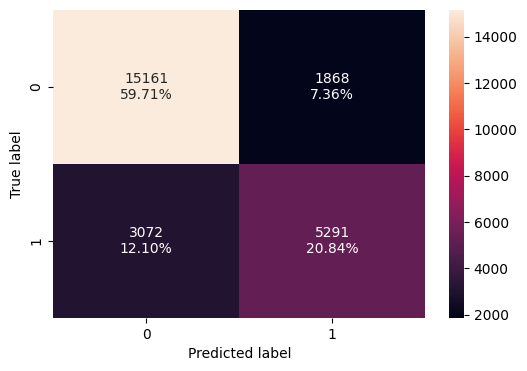

In [205]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [206]:
# Model Performance on Training Set
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)

# Display the Model Performance
print(log_reg_model_train_perf)

Training performance:
   Accuracy  Recall  Precision      F1
0   0.80545 0.63267    0.73907 0.68174


Observations:

No change in model performance

## ROC-AUC


Receiver Operating Characteristic (ROC) curve which is used to evaluate the performance of a binary classification model. The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between the two classes

**ROC Curve**: The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true positive rate is also known as sensitivity, recall, or probability of detection. The false positive rate is one minus the specificity.

**AUC Value**: The AUC value ranges from 0 to 1. A model with perfect predictive accuracy would have an AUC of 1, meaning it perfectly distinguishes between the two classes. An AUC of 0.5 suggests no discriminative ability, equivalent to random guessing. Your model has an AUC of 0.86, indicating a high level of predictive accuracy.

**Interpreting the Curve**:
* The curve starts at (0,0), meaning no false positives and no true positives when the threshold is at its maximum.
* The curve goes up to (1,1), meaning all cases are predicted positive as the threshold decreases to its minimum.
* The "elbow" or bend in the curve is the point where the model maximizes the true positive rate while minimizing the false positive rate. This point can be used as a cut-off for making classification decisions if needed.
* The dotted red line represents a no-skill classifier; an ideal model's ROC curve will bow towards the top left corner of the plot.

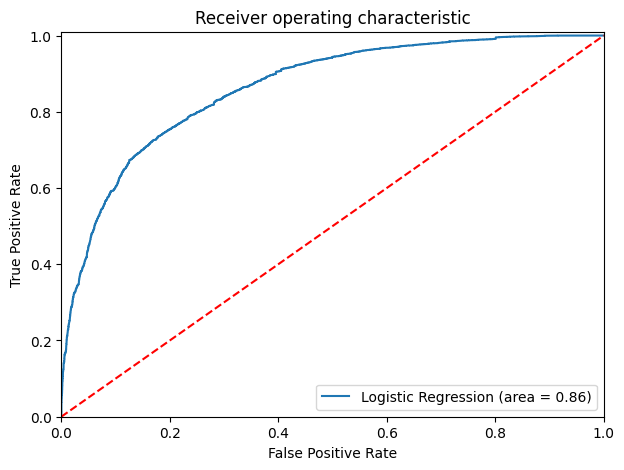

In [207]:
# ROC-AUC on training data set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observations:
* The logistic regression model performs significantly better than a no-skill classifier, as indicated by the ROC curve being far above the red dashed line of no discriminative ability
* The AUC of 0.86 confirms the model's good performance on the training set.
* Next evaluate the model on a separate testing set to check for overfitting.

#### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [208]:
# The optimal cut off would be where true positive rate (tpr) is high and false positive rate (fpr) is low
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print("Optimal threshold according to AUC-ROC:", optimal_threshold_auc_roc)

Optimal threshold according to AUC-ROC: 0.37005225587080454


Observations:

This means that the optimal threshold for classification is adjusted to approximately 0.37 (as determined by the AUC-ROC curve).

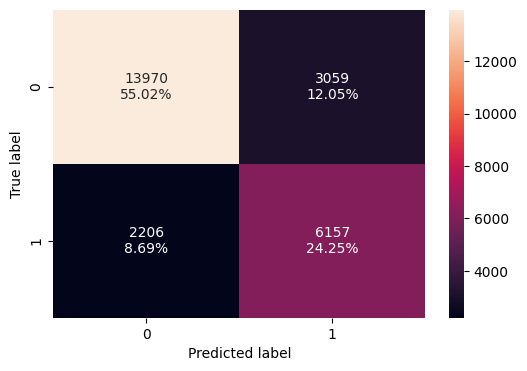

In [209]:
# Create the confusion matrix at the optimal threshold
# Create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)


In [210]:
# Evaluate the model performance at the optimal threshold
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance at optimal threshold according to AUC-ROC:")
log_reg_model_train_perf_threshold_auc_roc

Training performance at optimal threshold according to AUC-ROC:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


Onservations:

The output shows that after adjusting the threshold for classification to approximately 0.37 (as determined by the AUC-ROC curve), there is a notable change in the model's performance metrics:

* Accuracy: Slightly decreased from approximately 0.806 to 0.793.
* Recall: Significantly increased from 0.633 to 0.736.
* Precision: Decreased from approximately 0.740 to 0.668.
* F1 Score: Increased from approximately 0.682 to 0.700.

This shift in metrics indicates that by lowering the threshold for predicting a cancellation, the model is now identifying more true positives (hence the higher recall), but at the expense of also increasing the number of false positives (lower precision). However, F1 is a representation of these two measures and it has improved, so it means trade-off is beneficial in this case.

## Precision-Recall curve

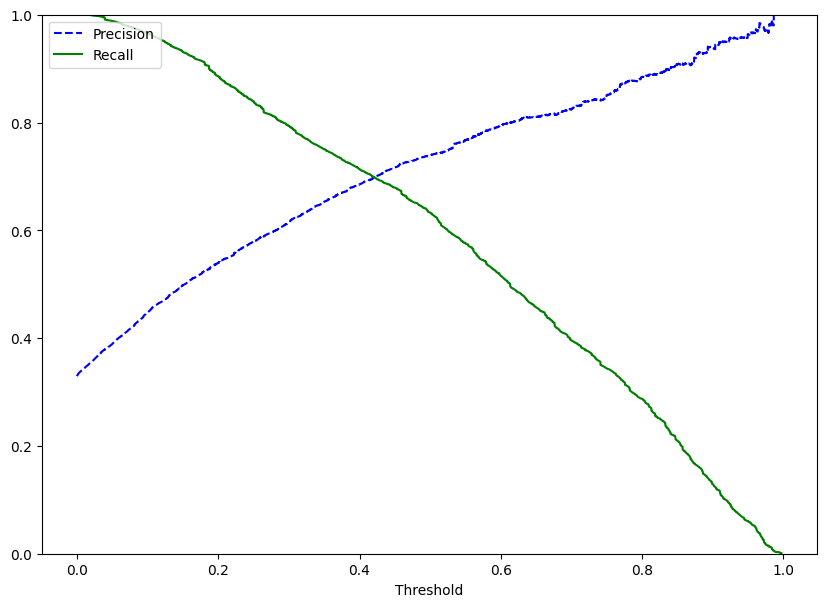

In [211]:
# Generate the precision, recall, and thresholds values
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores)

# Function to plot precision and recall against the threshold
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

# Plot precision-recall vs threshold
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [212]:
# Set the optimal threshold as determined from the curve
optimal_threshold_curve = 0.42

In [213]:
# Create the confusion matrix with the optimal threshold
# Create the confusion matrix for X_train1 and y_train with optimal_threshold_curve as threshold
y_pred_optimal = (lg1.predict(X_train1) >= optimal_threshold_curve).astype(int)
cm = confusion_matrix(y_train, y_pred_optimal)

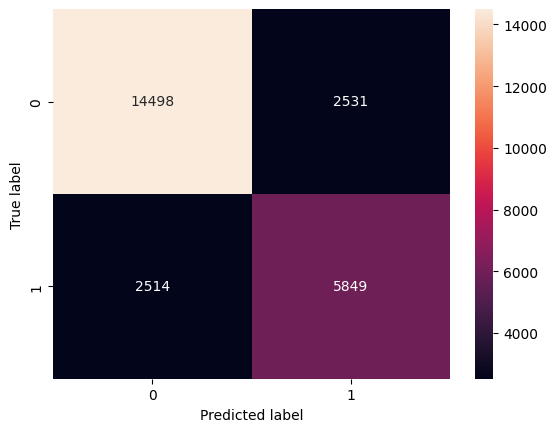

In [214]:
# Display the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Checking model performance on training set

In [215]:
# Evaluate the model performance at the optimal threshold
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)
print("Training performance at optimal threshold according to Precision-Recall curve:")
log_reg_model_train_perf_threshold_curve

Training performance at optimal threshold according to Precision-Recall curve:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


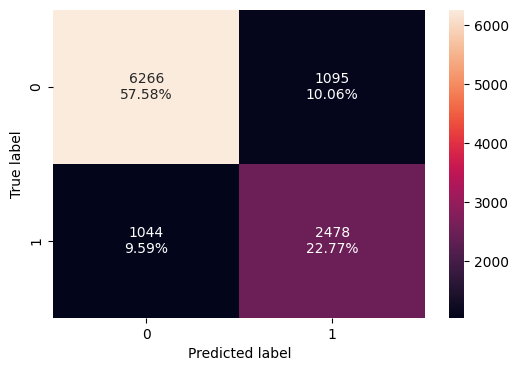

In [216]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [217]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


Observations:

After adjusting the threshold according to the Precision-Recall curve to 0.42, the model's performance on the training set is more balanced.


#### Let's check the performance on the test set

**Using model with default threshold**

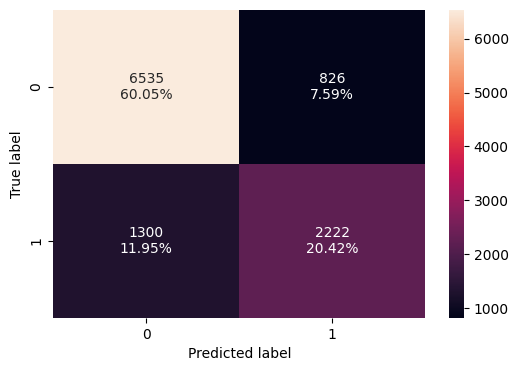

In [218]:
# Logistic Regression: Check performance on the test set using the default threshold
confusion_matrix_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

In [219]:
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


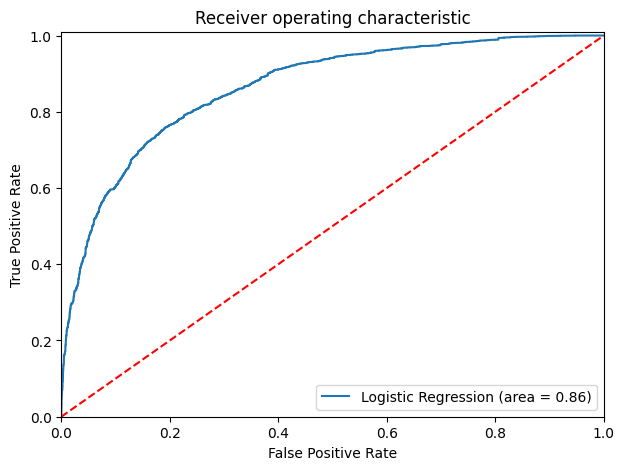

In [220]:
# Logistic Regression: ROC curve on the test set
logit_roc_auc_test = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


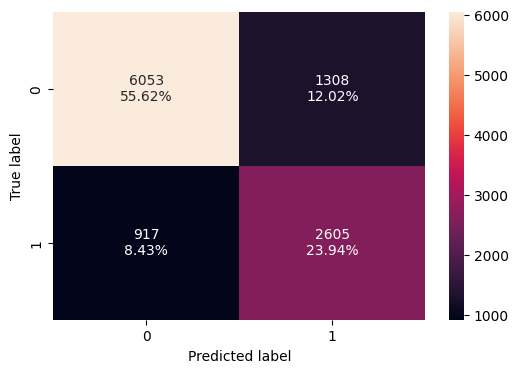

In [221]:
# Logistic Regression: Check performance on the test set using the AUC-ROC determined threshold
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

In [222]:
# Model performance summary: Training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - Default Threshold",
    "Logistic Regression - 0.37 Threshold",
    "Logistic Regression - 0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression - Default Threshold,Logistic Regression - 0.37 Threshold,Logistic Regression - 0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


Observations:

* The model with a threshold of 0.37 has the highest F1 score, which is a balance between precision and recall, making it potentially the best model among the three for avoiding both false positives and false negatives.
* However, the default threshold model has the highest precision, indicating a lower false positive rate which might be preferred if the cost of a false positive is higher.

In [223]:
# Test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression - Default Threshold",
    "Logistic Regression - 0.37 Threshold",
    "Logistic Regression - 0.42 Threshold",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Logistic Regression - Default Threshold,Logistic Regression - 0.37 Threshold,Logistic Regression - 0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


Observations:
* The model performances are quite similar to the training set, with the 0.37 threshold model showing a slightly better balance between precision and recall as indicated by the F1 score.
* The recall is highest for the 0.37 threshold model, indicating it is better at identifying actual positives (canceled bookings), which could be important if the hotel wants to minimize the chance of a booking being canceled without being flagged.
* The precision drops slightly for the models with the adjusted thresholds, indicating an increase in false positives (predicting a booking will be canceled when it actually won't be).

# Decision Tree

## Data Preparation

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [224]:
# For Decision Tree: Preparing the data
# Creating dummy variables for categorical features
X = pd.get_dummies(data.drop(["booking_status"], axis=1))
Y = data["booking_status"]

# Splitting the data into train and test sets with a 70:30 ratio and a random state of 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [225]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 30)
Shape of test set :  (10883, 30)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [226]:
# Defining the performance metrics function for sklearn models
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [227]:
# Defining the confusion matrix function
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Building Decision Tree Model

In [228]:
# Building the Decision Tree Model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


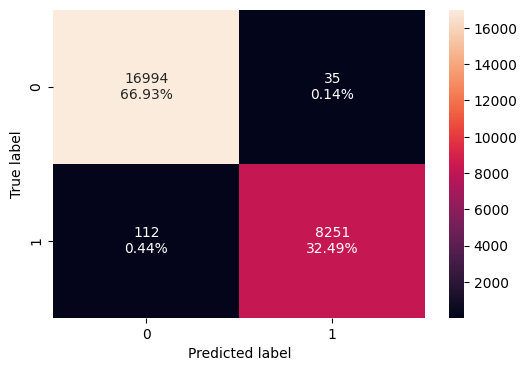

In [229]:
# Evaluating model performance on training data
confusion_matrix_sklearn(model, X_train, y_train)
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print("Training Performance:")
decision_tree_perf_train

#### Checking model performance on test set

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.87182,0.80522,0.80000,0.80260


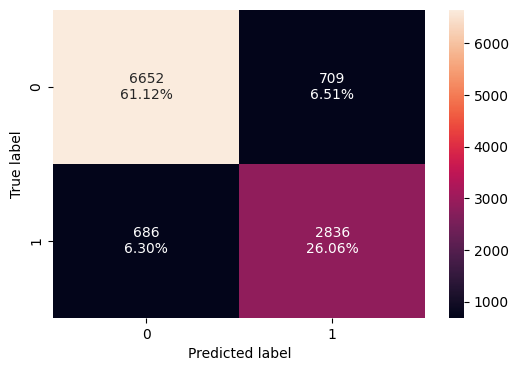

In [230]:
# Evaluating model performance on test data
confusion_matrix_sklearn(model, X_test, y_test)
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
print("Test Performance:")
decision_tree_perf_test

Observations:

* The drop in performance metrics from the training set to the test set is indicative of this overfitting.
* Overfitting occurs when a model learns the training data too well, including its noise and outliers, and thus may not perform as well on new, unseen data.
* _Next step_:
  * **Prune the tre**e: limit the depth of the tree or set a minimum number of samples required at a leaf node to help the model generalize better to new data.
  * **Feature importance analysis:** Analyzing which features are least impactful on the outcome and removing those first can simplify the model and reduce the overfitting.
  

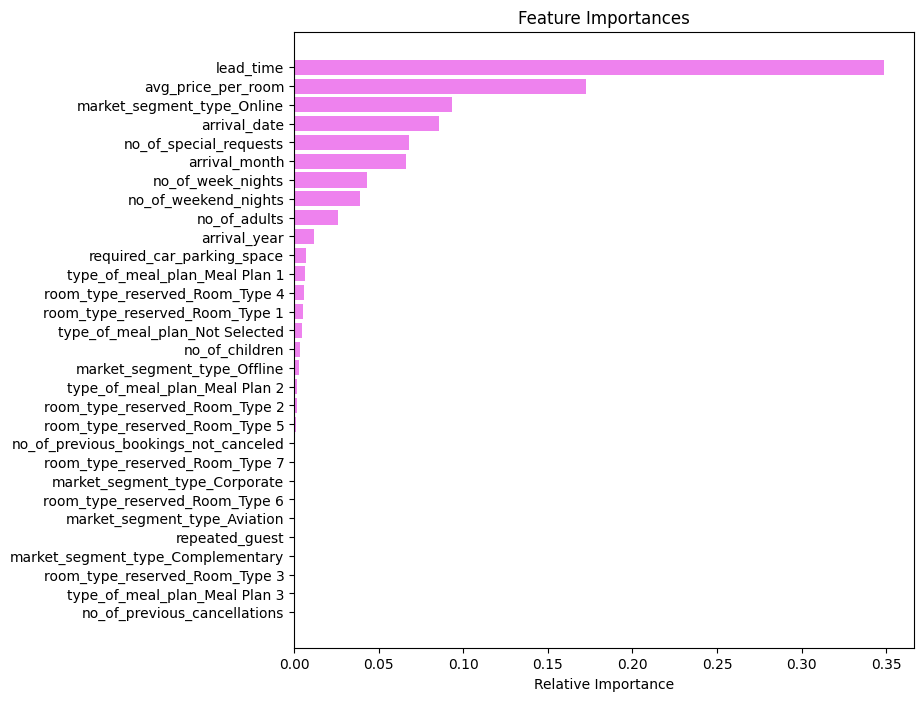

In [231]:
# Model important features
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pruning the tree

**Pre-Pruning**

In [232]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=75,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


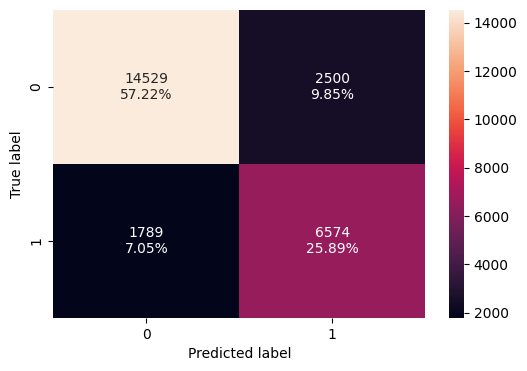

In [233]:
# Evaluating model performance on training data
confusion_matrix_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
print("Training Performance:")
decision_tree_tune_perf_train

#### Checking performance on test set

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.83488,0.78308,0.72751,0.75427


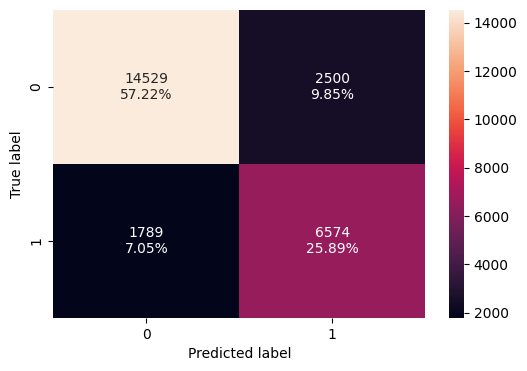

In [234]:
# Evaluating model performance on test data
confusion_matrix_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
print("Test Performance:")
decision_tree_tune_perf_test

#### Visualizing the Decision Tree

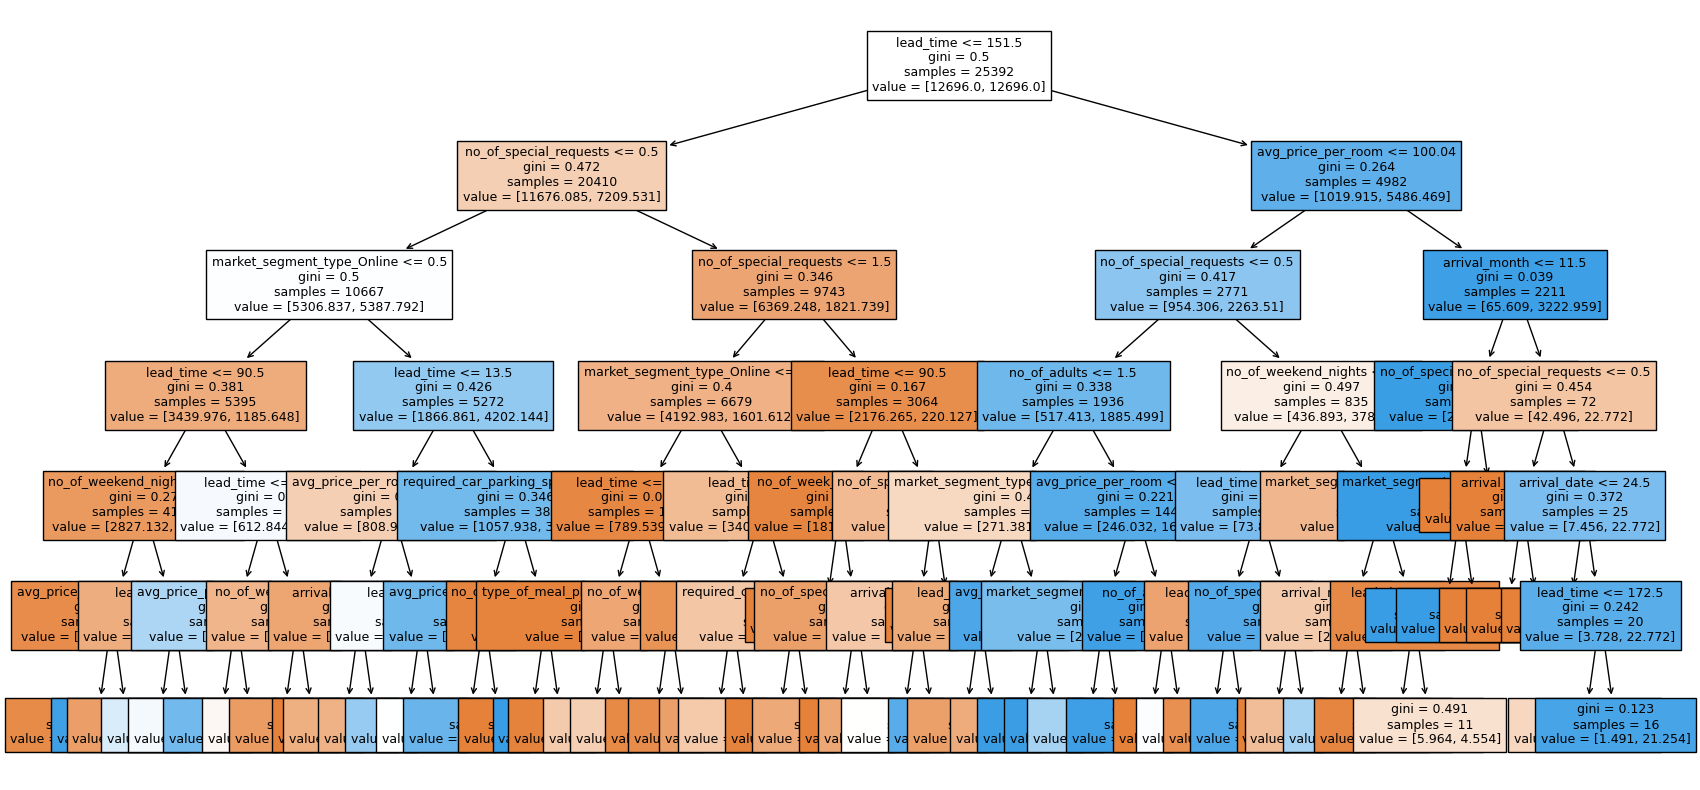

In [235]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [236]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

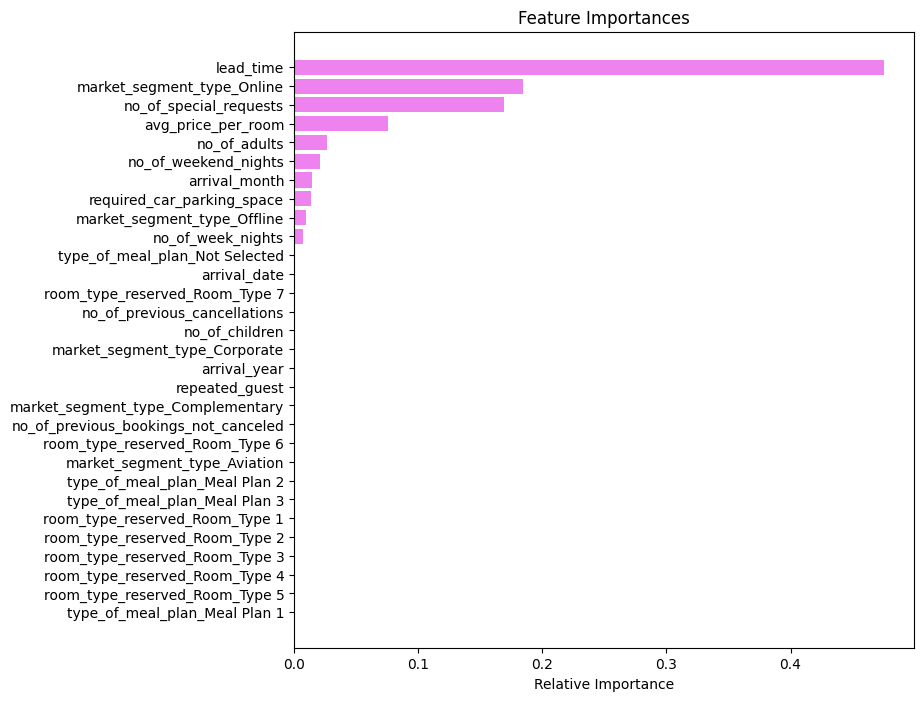

In [237]:
# Check important of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
* lead_time and market_segment_type_Online remain the features with highest importance.


**Cost Complexity Pruning**

In [238]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [239]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


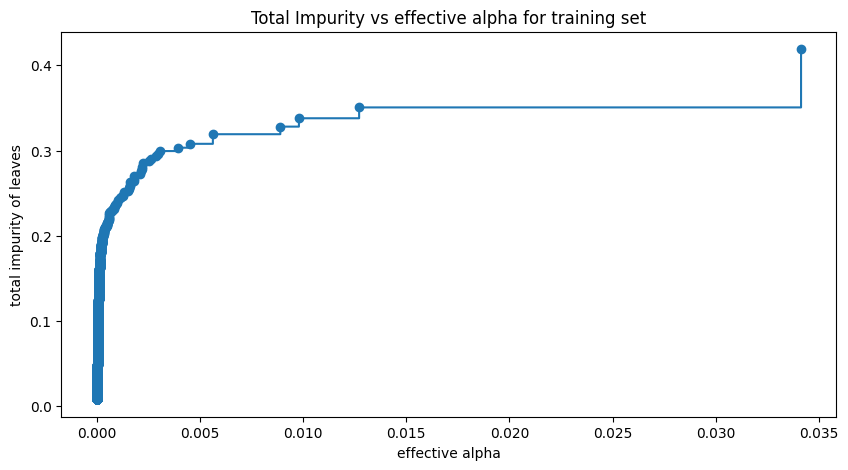

In [240]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Train the decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [241]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## Fit the decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137149


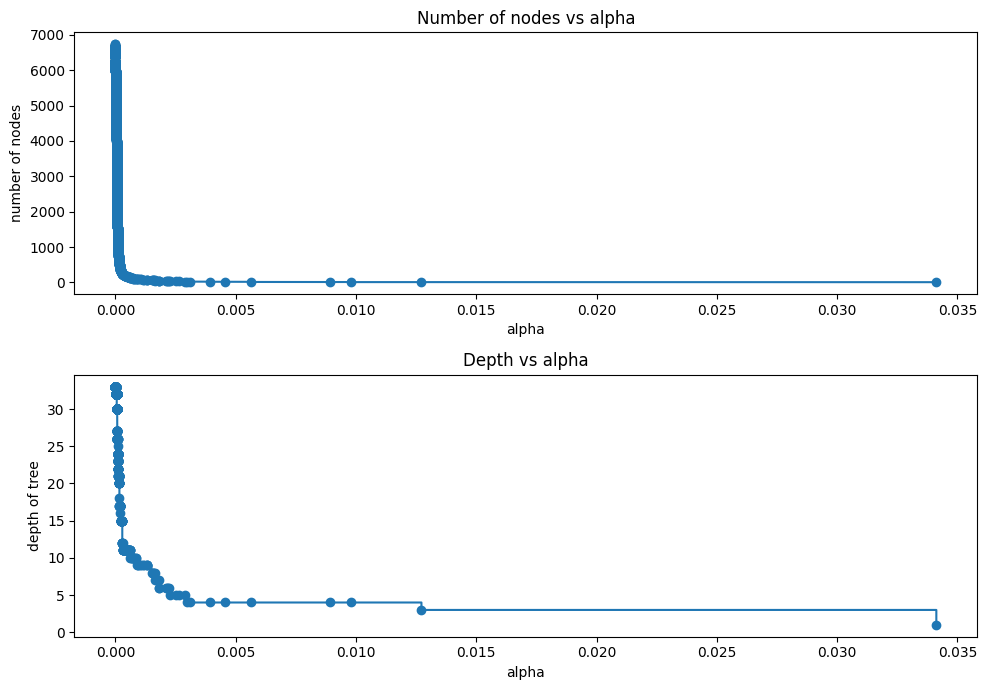

In [242]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [243]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

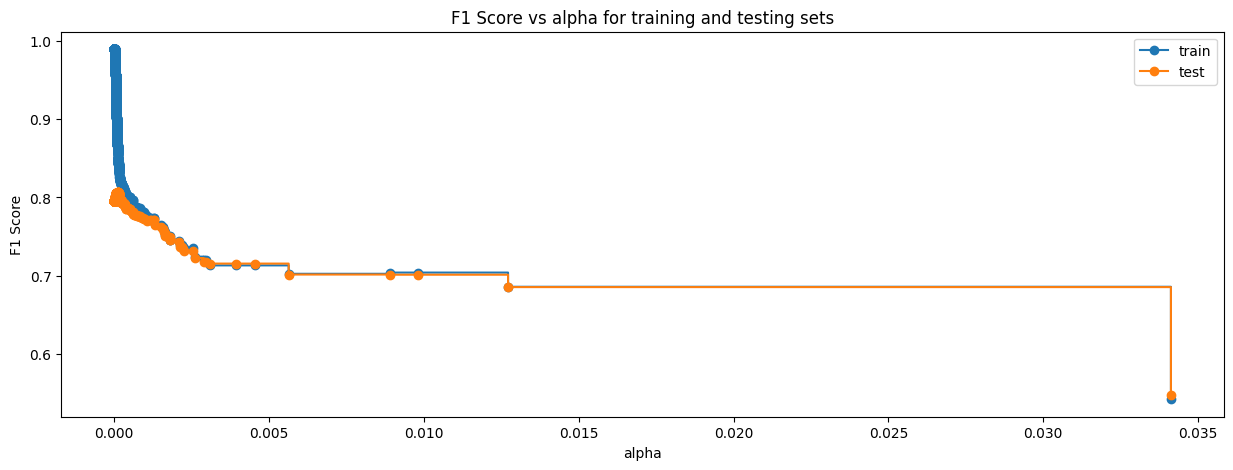

In [244]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [245]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001348499238051838, class_weight='balanced',
                       random_state=1)


#### Checking performance on training set

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.89414,0.89669,0.80435,0.84802


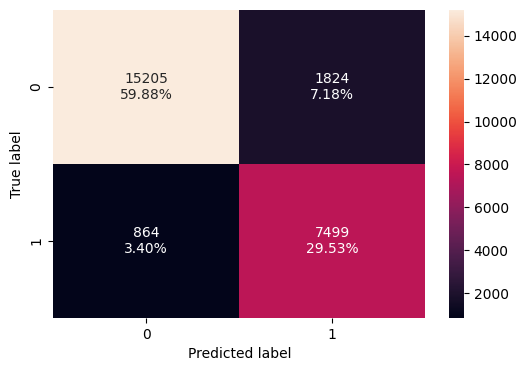

In [246]:
# Evaluating model performance on training data
confusion_matrix_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)

print("Training Performance:")
decision_tree_post_perf_train

#### Checking performance on test set

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.89414,0.89669,0.80435,0.84802


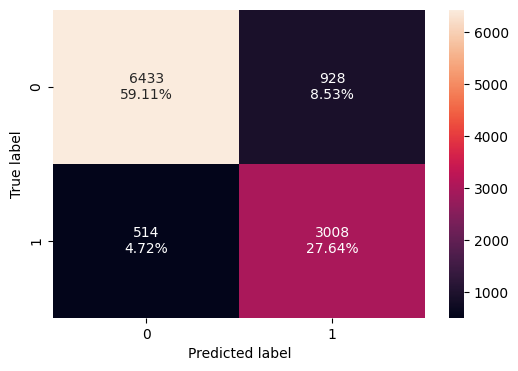

In [247]:
# Evaluating model performance on test data
confusion_matrix_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test =  model_performance_classification_sklearn(best_model,X_train,y_train)

print("Test Performance:")
decision_tree_post_perf_test

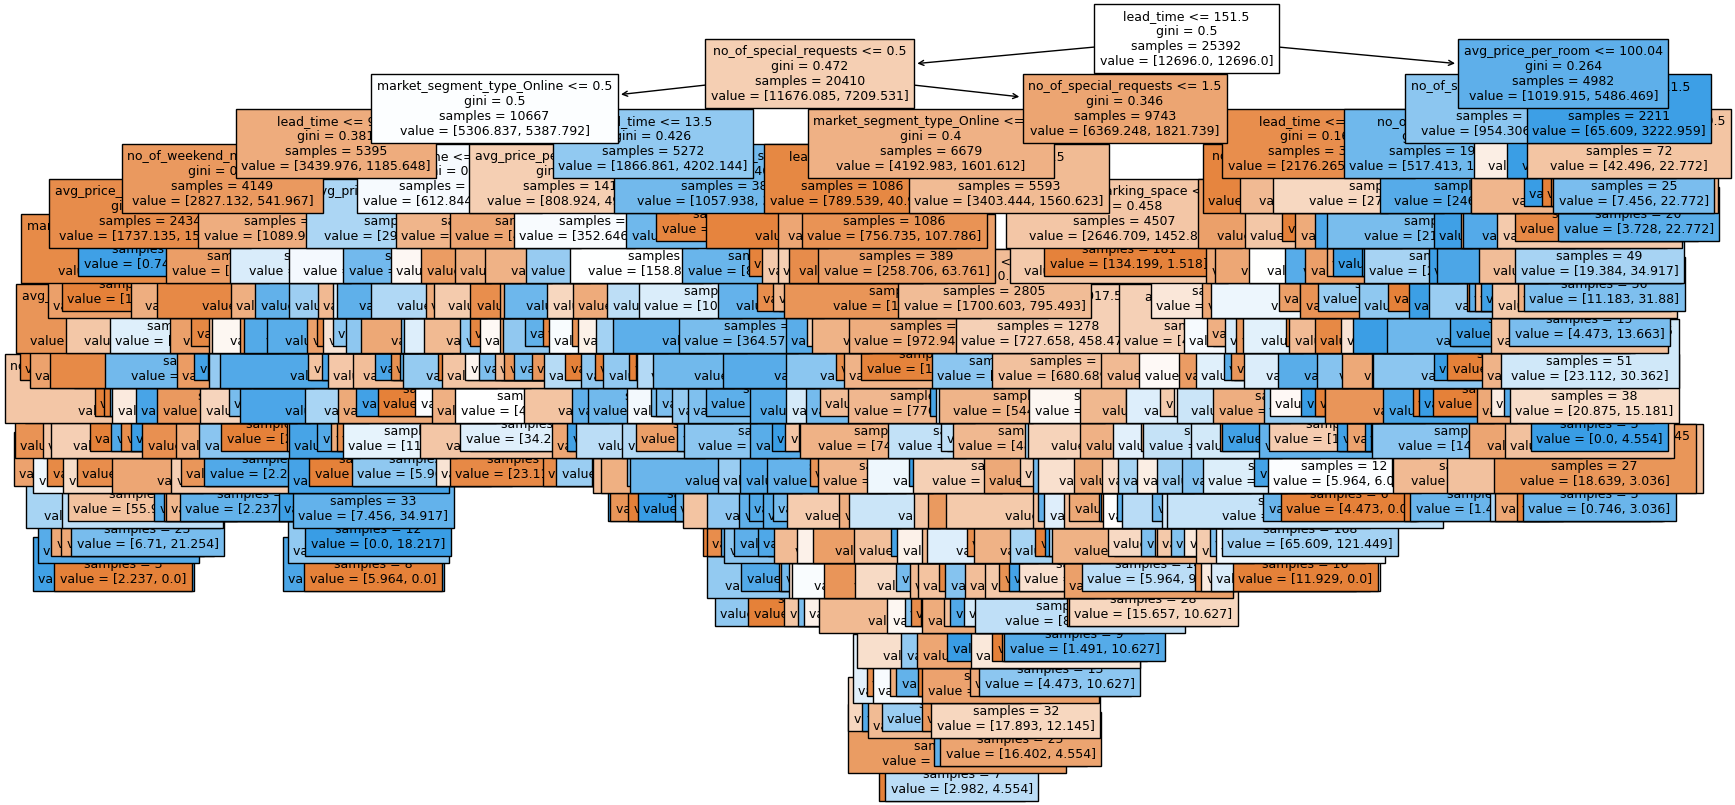

In [248]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [249]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

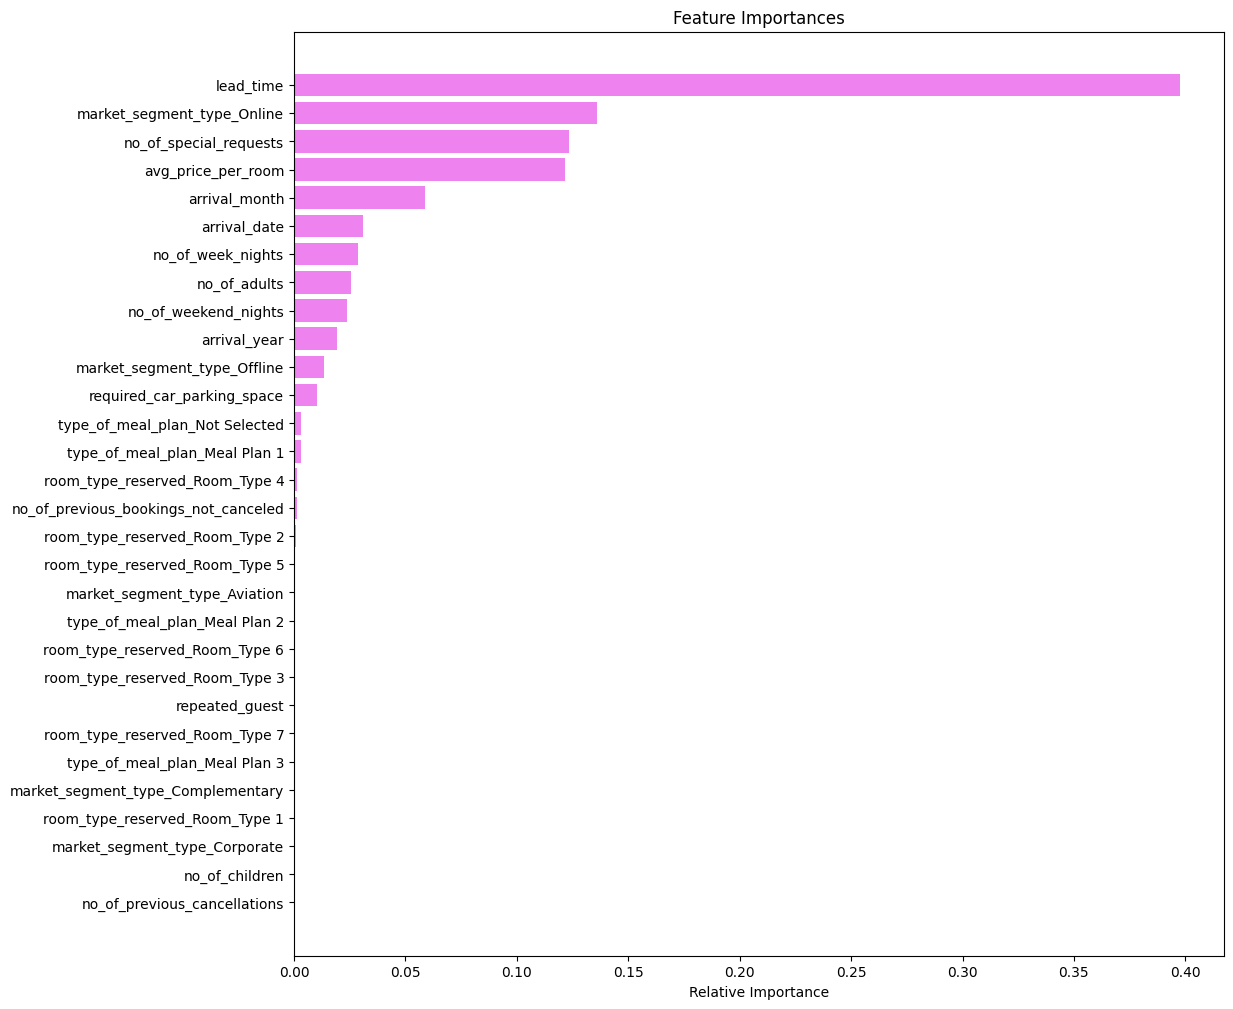

In [250]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Comparing Decision Tree models

In [251]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.99421,0.89414
Recall,0.98661,0.98661,0.89669
Precision,0.99578,0.99578,0.80435
F1,0.99117,0.99117,0.84802


In [252]:
# Testing performance comparison
models_test_comp_df = pd.concat(
    [
    decision_tree_perf_test.T,
    decision_tree_tune_perf_test.T,
    decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87182,0.83488,0.89414
Recall,0.80522,0.78308,0.89669
Precision,0.80000,0.72751,0.80435
F1,0.80260,0.75427,0.84802


Model Performace Observations:

In summary, the post-pruning process seems to have successfully improved the model's generalization ability, as indicated by the higher testing metrics compared to both the default model and the pre-pruned model. However, the decision tree still seems to be overfitting, given the perfect training scores

### Business Recommendations


* Focus on Lead Time: The feature importance analysis revealed that lead time is a significant predictor of cancellations. Hotels could offer incentives for early bookings or implement non-refundable deposits after a certain period to discourage cancellations.

* Special Request Attention: Bookings with more special requests tend to have lower cancellation rates. The hotel could encourage guests to make special requests by offering customizable options during booking, which may lead to higher commitment to the reservation.

* Dynamic Pricing Strategy: Given that the average price per room is an important feature, implementing a dynamic pricing strategy that adjusts rates based on demand, lead time, and other factors could maximize revenue and manage cancellations effectively.

* Retention of Repeat Guests: Repeat guests have shown lower cancellation rates. Loyalty programs and personalized experiences could be designed to increase the number of repeat guests.

* Market Segment Targeting: Different market segments exhibit different cancellation behaviors. Tailored marketing strategies for segments with lower cancellation rates could be beneficial. Additionally, packages or promotions could be designed for segments with higher cancellation rates to improve retention.

* Month-wise Analysis: The analysis indicates that certain months have higher numbers of guests and potentially different cancellation rates. Targeted promotions during the low-demand months and preparedness for high-traffic months can improve occupancy rates.

* Acquire data for other year to further investigate the sesonality within and between years.

